# IMPORTS

In [143]:

import matplotlib.pyplot as plt
import numpy as np
from skimage import io, filters, feature
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
import imageio
% matplotlib inline

UsageError: Line magic function `%` not found.


Little trick to list package versions

In [144]:
!pip show scikit-image|grep Version

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


In [145]:
!pip show scikit-learn|grep Version

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


In [146]:
!pip show numpy|grep Version

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
Version: 1.8.0rc1
Location: /System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python


# Change Detection Function

In [154]:
# image1 = io.imread('awifs_ndvi_201701_15_1_clipped.tif')
# image2 = io.imread('awifs_ndvi_201707_15_1_clipped.tif')
def function(image1,image2,imagename,flag):
    diff_image = abs(image1-image2)
#     print(diff_image.shape)
    fig_width = 20
    fig_height = 8

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(fig_width, fig_height))
    if flag:
        ax1.imshow(image1, cmap="gray") 
        ax2.imshow(image2, cmap="gray") 
        ax3.imshow(diff_image, cmap="hot"); # crudely calc difference
    n_components=100

    pca = PCA(n_components=n_components)
    pca.fit(diff_image)

    diff_image_pca = pca.fit_transform(diff_image)
#     print(diff_image_pca.shape)

    diff_image_restored = pca.inverse_transform(diff_image_pca)
#     print(diff_image_restored.shape)
    np.sum(pca.explained_variance_ratio_)
    print(f"The {n_components} components explain {int(np.sum(pca.explained_variance_ratio_) * 100)}% of the variance")
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(fig_width, fig_height))

    if flag:
        ax1.imshow(diff_image, cmap="gray")
        ax2.imshow(diff_image_restored, cmap="gray"); # crudely calc difference
    else:
        imageio.imwrite("diff_image/"+imagename+"diff_image.jpg",diff_image)
        imageio.imwrite("diff_image_restored/"+imagename+"diff_image_restored.jpg",diff_image_restored)

# Collecting all file names into a array

In [149]:
import os
img_pt_p=r'/Users/venkateshbh/Desktop/satellite-image-deep-learning-master/change_detection/using_pca_and_k_means/Clipped_NDVI'
arr=[]
for k in os.listdir(r'//Users/venkateshbh/Desktop/satellite-image-deep-learning-master/change_detection/using_pca_and_k_means/Clipped_NDVI'):
                    if k=='.DS_Store':
                        continue
                    print(k)
                    arr.append(k)
#                     img_pt=img_pt_p+"/"+k
#                     img = cv2.imread(img_pt)
    
#                     dim = (width, height)
#                     # resize image
#                     resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#                     #im_unpre.append(np.array(img).flatten())
#                     img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
#                     equ = cv2.equalizeHist(img_gray)
#                     equu.append(equ)
#                     immatrix.append(img_gray)
#                     kk=k[:-5]
#                     #print(kk)
#                     Y.append(myDict[kk])
arr.sort()
print(arr)

awifs_ndvi_201706_15_1_clipped.tif
awifs_ndvi_201805_15_1_clipped.tif
awifs_ndvi_201703_15_2_clipped.tif
awifs_ndvi_201811_15_1_clipped.tif
awifs_ndvi_201712_15_1_clipped.tif
awifs_ndvi_201708_15_2_clipped.tif
awifs_ndvi_201810_15_2_clipped.tif
awifs_ndvi_201709_15_1_clipped.tif
awifs_ndvi_201804_15_2_clipped.tif
awifs_ndvi_201707_15_2_clipped.tif
awifs_ndvi_201801_15_1_clipped.tif
awifs_ndvi_201702_15_1_clipped.tif
awifs_ndvi_201801_15_2_clipped.tif
awifs_ndvi_201702_15_2_clipped.tif
awifs_ndvi_201804_15_1_clipped.tif
awifs_ndvi_201707_15_1_clipped.tif
awifs_ndvi_201709_15_2_clipped.tif
awifs_ndvi_201810_15_1_clipped.tif
awifs_ndvi_201708_15_1_clipped.tif
awifs_ndvi_201811_15_2_clipped.tif
awifs_ndvi_201712_15_2_clipped.tif
awifs_ndvi_201703_15_1_clipped.tif
awifs_ndvi_201706_15_2_clipped.tif
awifs_ndvi_201805_15_2_clipped.tif
awifs_ndvi_201809_15_2_clipped.tif
awifs_ndvi_201710_15_1_clipped.tif
awifs_ndvi_201701_15_2_clipped.tif
awifs_ndvi_201802_15_2_clipped.tif
awifs_ndvi_201704_15

# Change detection function call for all images w.r.t first image

(2135, 100)
(2135, 2118)
The 100 components explain 41% of the variance


Lossy conversion from float64 to uint8. Range [-163.73716577956162, 409.80348294179873]. Convert image to uint8 prior to saving to suppress this warning.


(2135, 100)
(2135, 2118)
The 100 components explain 47% of the variance


Lossy conversion from float64 to uint8. Range [-175.30258337368167, 437.304517279014]. Convert image to uint8 prior to saving to suppress this warning.


(2135, 100)
(2135, 2118)
The 100 components explain 44% of the variance


Lossy conversion from float64 to uint8. Range [-151.4078243441722, 393.66306005002923]. Convert image to uint8 prior to saving to suppress this warning.


(2135, 100)
(2135, 2118)
The 100 components explain 42% of the variance


Lossy conversion from float64 to uint8. Range [-142.62496225980266, 381.7162282975348]. Convert image to uint8 prior to saving to suppress this warning.


(2135, 100)
(2135, 2118)
The 100 components explain 45% of the variance


Lossy conversion from float64 to uint8. Range [-129.99640072189507, 352.4424938076853]. Convert image to uint8 prior to saving to suppress this warning.


(2135, 100)
(2135, 2118)
The 100 components explain 40% of the variance


Lossy conversion from float64 to uint8. Range [-121.03950651253436, 366.78177980925517]. Convert image to uint8 prior to saving to suppress this warning.


(2135, 100)
(2135, 2118)
The 100 components explain 42% of the variance


Lossy conversion from float64 to uint8. Range [-137.0266344568294, 385.65703265489424]. Convert image to uint8 prior to saving to suppress this warning.


(2135, 100)
(2135, 2118)
The 100 components explain 44% of the variance


Lossy conversion from float64 to uint8. Range [-113.38353669614298, 399.9892196509295]. Convert image to uint8 prior to saving to suppress this warning.


(2135, 100)
(2135, 2118)
The 100 components explain 41% of the variance


Lossy conversion from float64 to uint8. Range [-108.24447564041844, 347.7319818814268]. Convert image to uint8 prior to saving to suppress this warning.


(2135, 100)
(2135, 2118)
The 100 components explain 42% of the variance


Lossy conversion from float64 to uint8. Range [-115.63401784249763, 371.6003386896444]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 45% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-106.28826820584017, 335.4894901611433]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 57% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-131.15546980392702, 355.5436994580807]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 71% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-75.27088113515902, 336.89659231951424]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 53% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-79.54124873448535, 340.79741903893506]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 49% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-135.28433340939543, 359.25023046486115]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 49% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-169.7336606253739, 378.14593777504285]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 42% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-162.57884927996903, 370.7778542770361]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 47% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-195.65748857702266, 386.30834667198076]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 47% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-145.35811634701, 382.83776689114734]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 44% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-147.3861894124925, 399.1948654098666]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 41% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-192.42176632291657, 403.6306181557245]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 36% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-158.2510119410494, 410.9428584527249]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 34% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-182.14147347844917, 392.4070661132875]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 41% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-158.43310992402496, 411.7684148143595]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 45% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-163.06266497491745, 417.71058241229093]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 47% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-154.79639342027667, 446.8478008107243]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 45% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-150.85900430562026, 413.66578720172765]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 43% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-131.5519985516066, 383.8770764060529]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 42% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-138.7997744617326, 389.4462519480547]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 45% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-106.93462486998453, 373.0195333989185]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 40% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-146.02786876802645, 396.27516321105026]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 49% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-150.92739054673143, 401.30741930455133]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 47% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-77.15002425346151, 330.06010780226984]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 56% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-67.79461906462805, 319.31340703127717]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 fig

(2135, 100)
(2135, 2118)
The 100 components explain 72% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-128.1308400480015, 347.01458751113574]. Convert image to uint8 prior to saving to suppress this warning.


(2135, 100)
(2135, 2118)
The 100 components explain 67% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 72% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-92.03153561140034, 355.8742387199466]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 57% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-81.13594584445565, 324.04316045195503]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 78% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-64.36933606664012, 315.318702946185]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 54% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-121.70132409263952, 364.5037986683095]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 47% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-128.90187400019676, 384.72346693530255]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 49% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-140.37848251609282, 391.48705740162546]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 48% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-172.01876917584082, 410.02296758286093]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 40% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-153.47825944338192, 410.3694201014383]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 40% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-147.58527232175015, 398.8498442638419]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 34% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-155.9352411258856, 372.25076981679473]. Convert image to uint8 prior to saving to suppress this warning.
/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


(2135, 100)
(2135, 2118)
The 100 components explain 37% of the variance


/Users/venkateshbh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Lossy conversion from float64 to uint8. Range [-145.3826933629358, 422.3064116563364]. Convert image to uint8 prior to saving to suppress this warning.


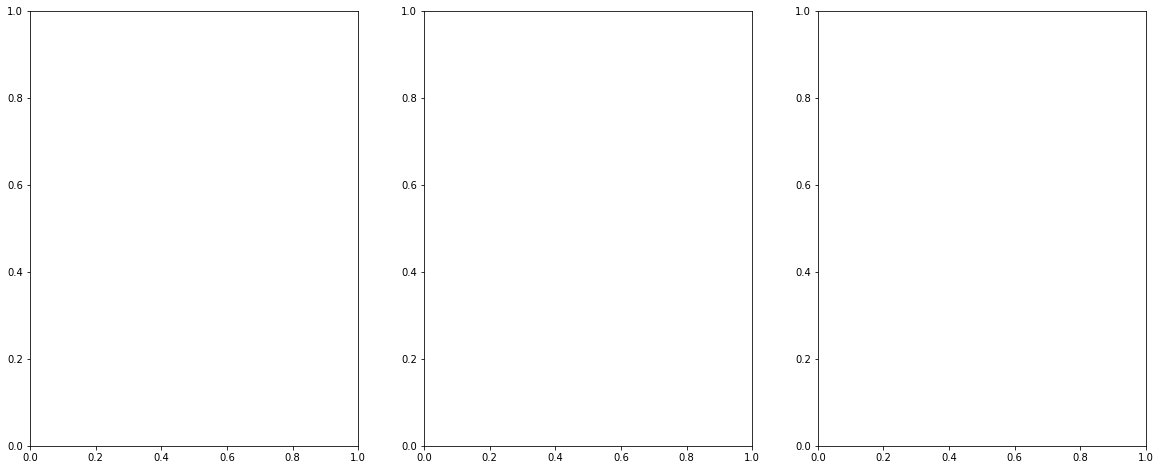

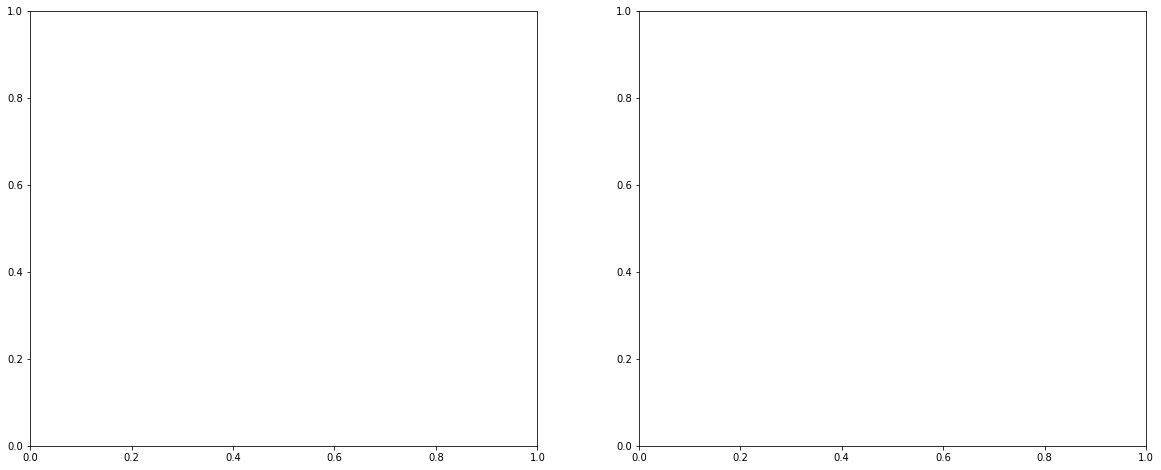

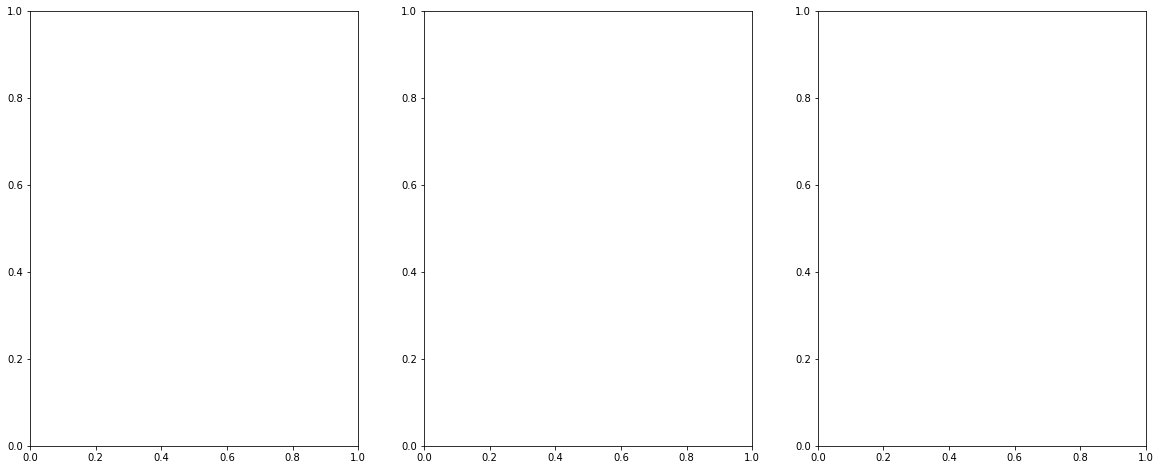

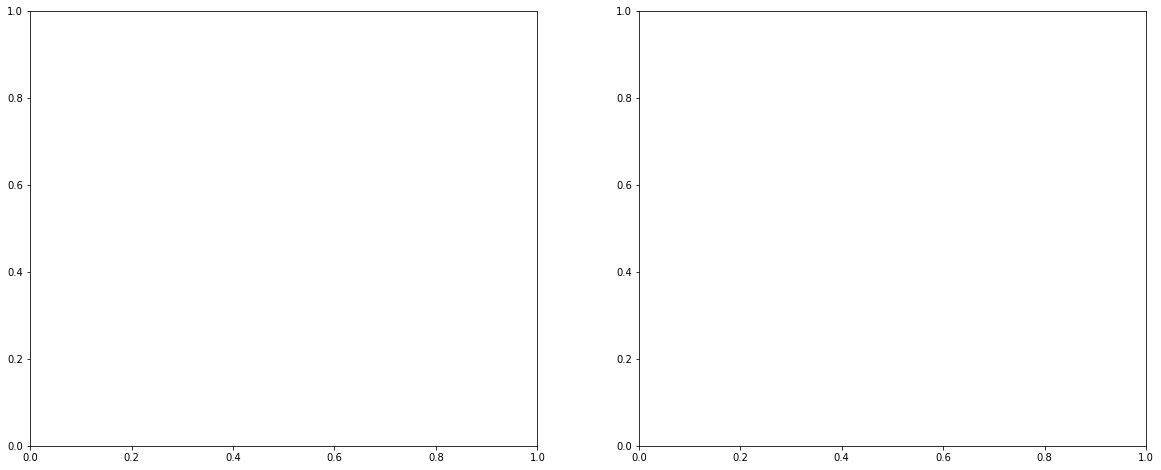

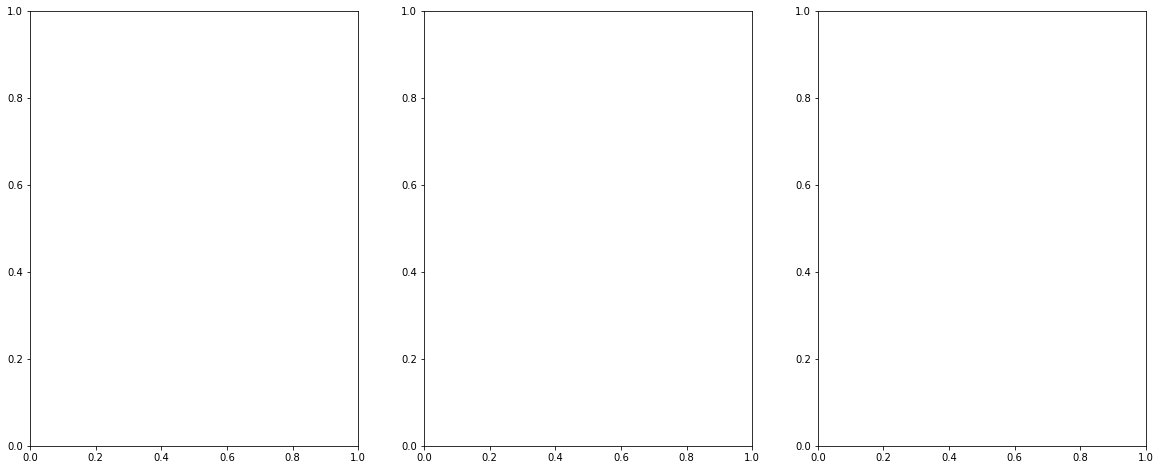

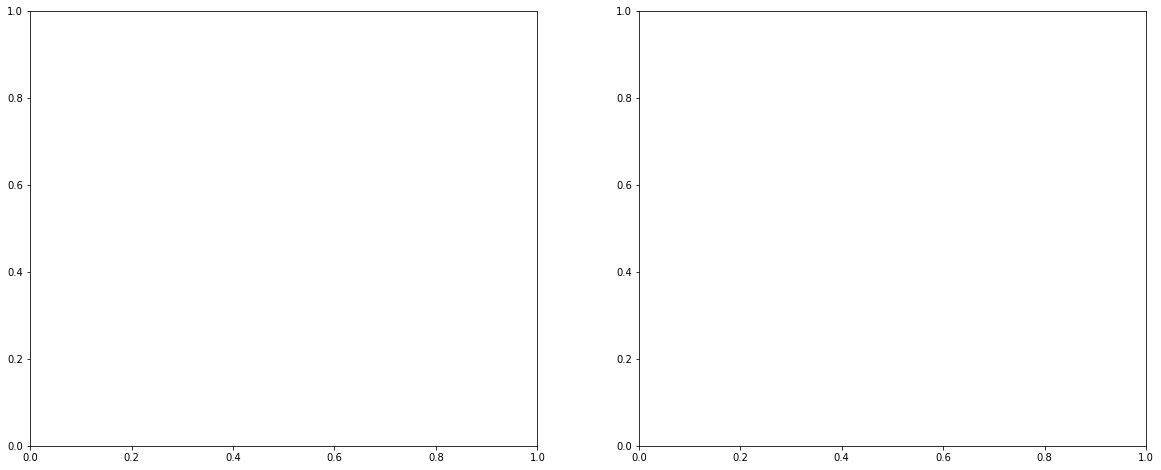

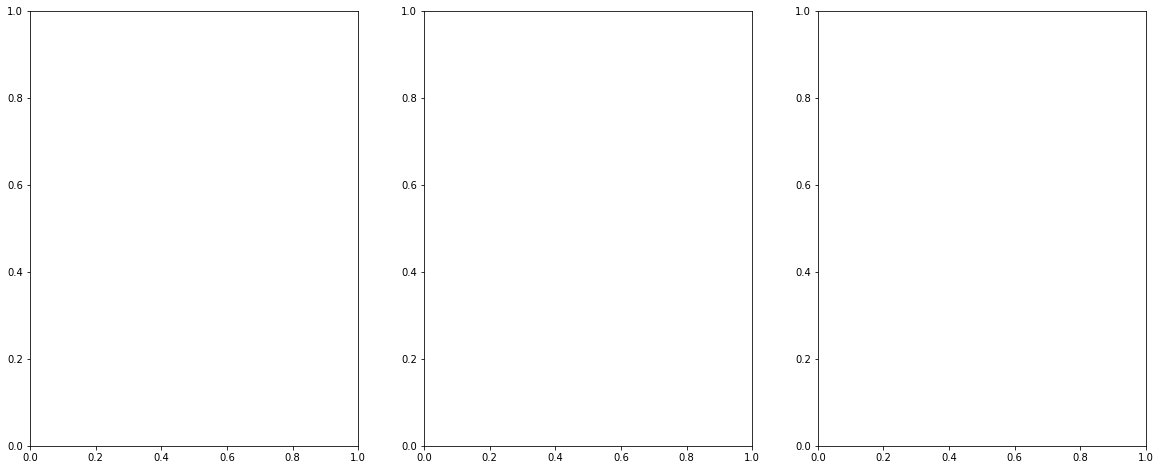

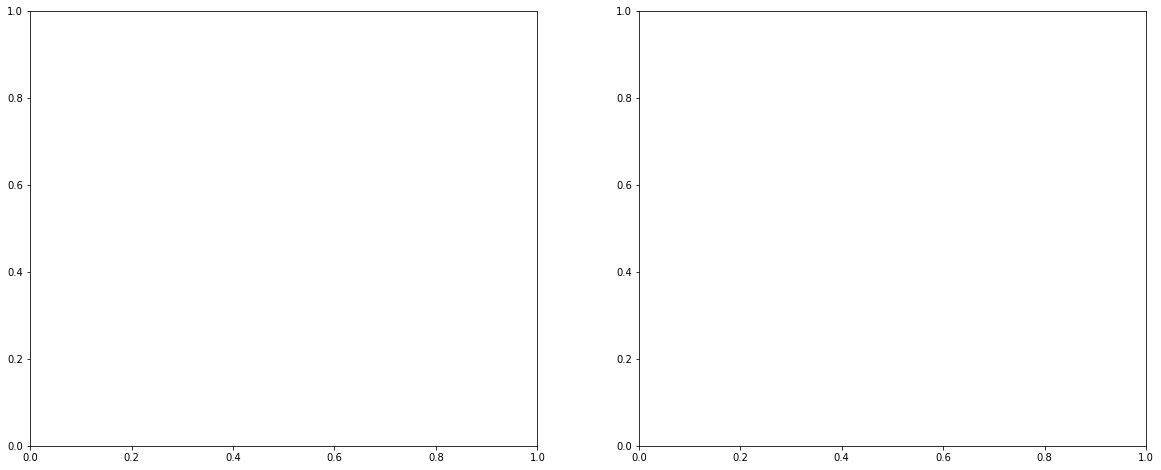

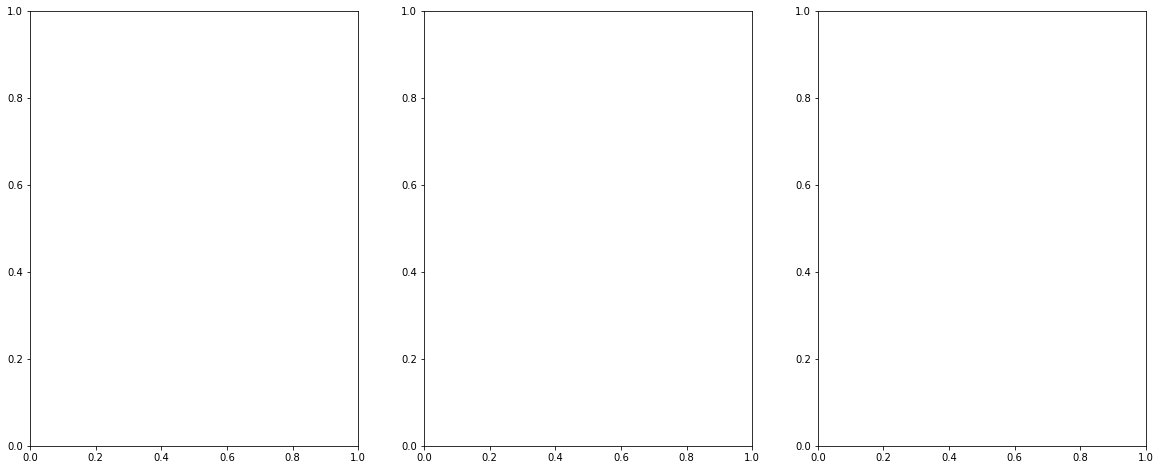

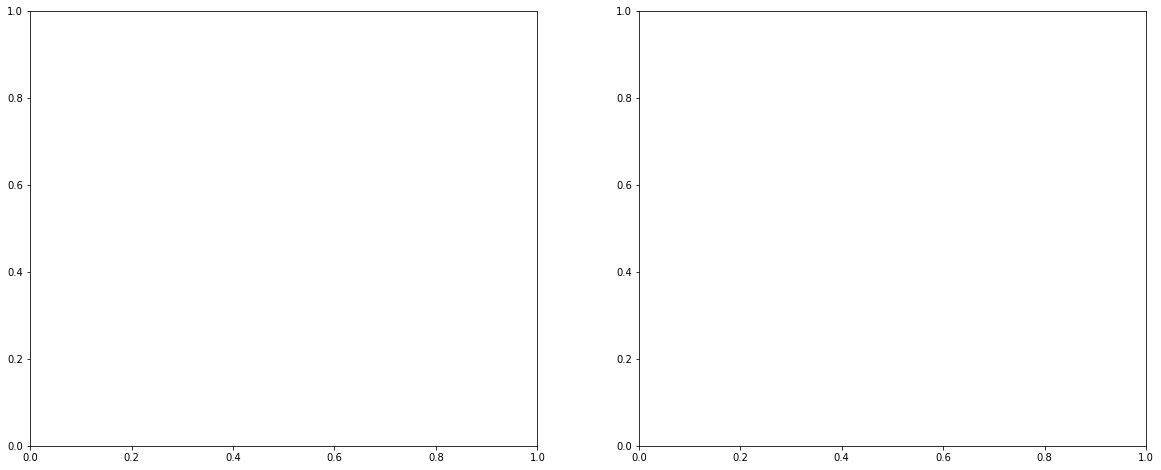

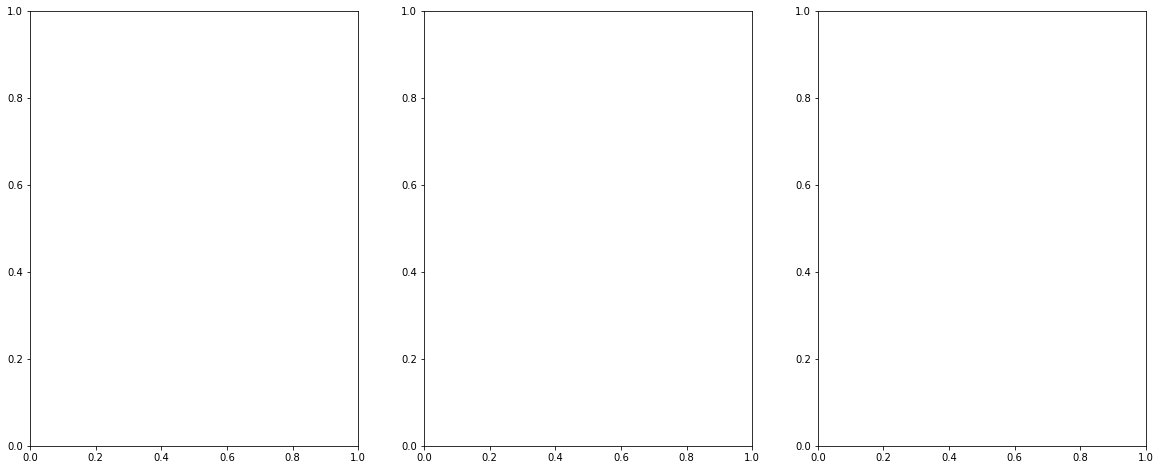

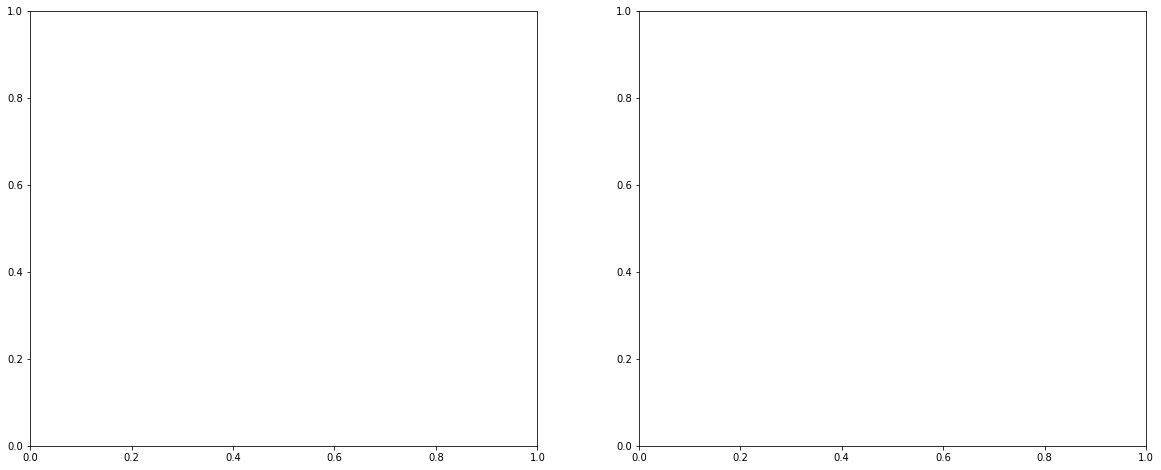

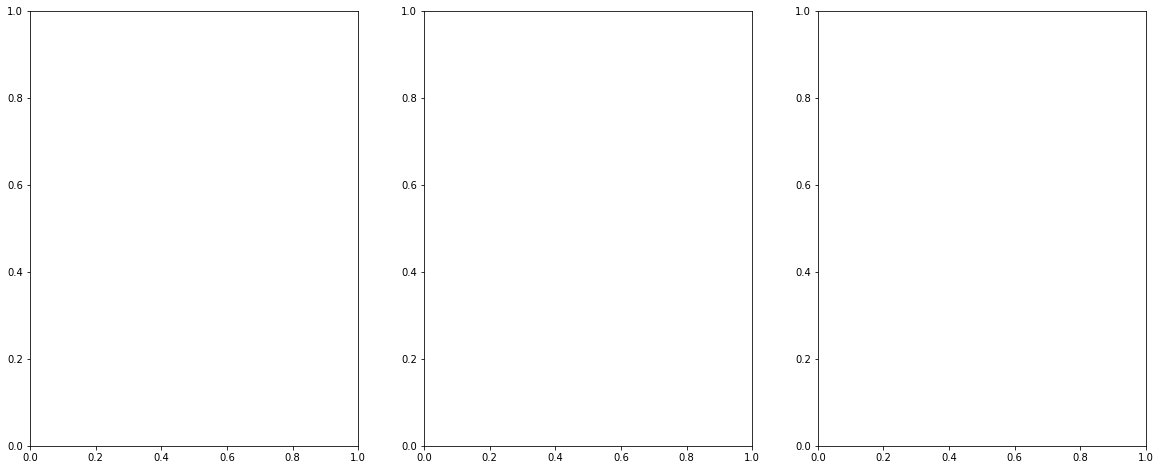

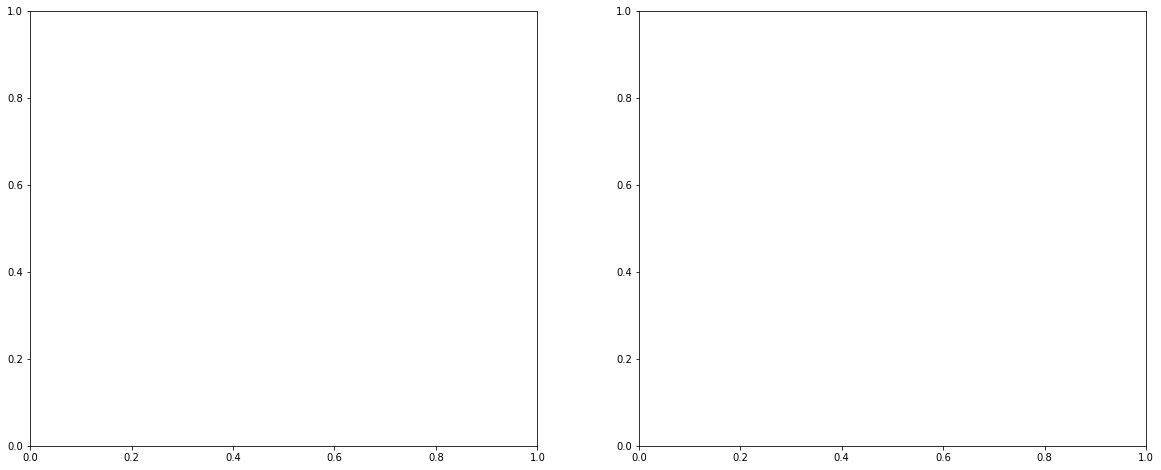

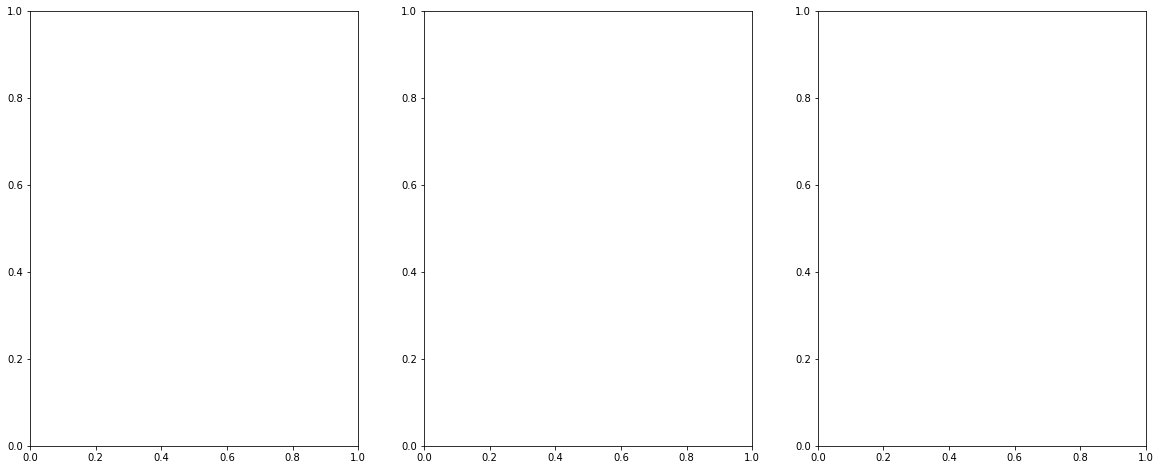

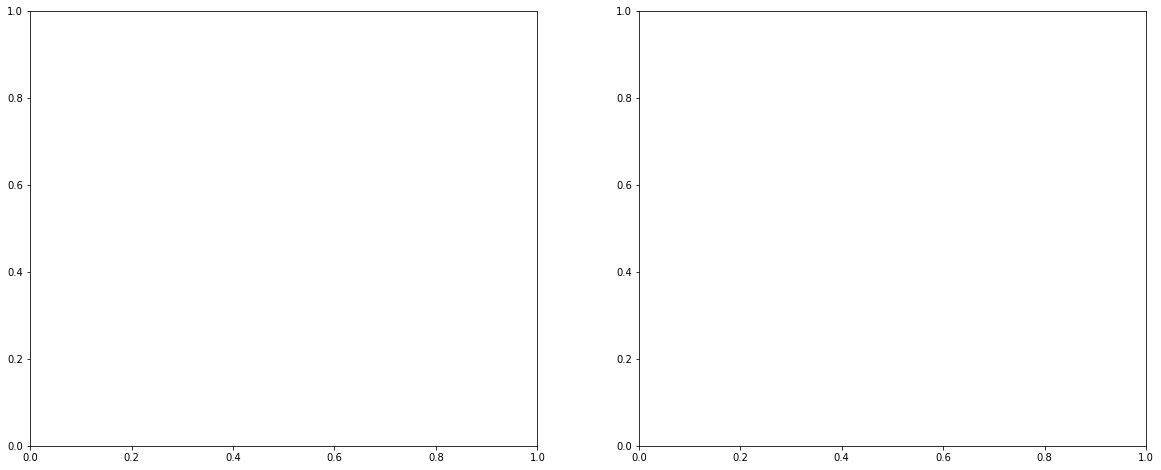

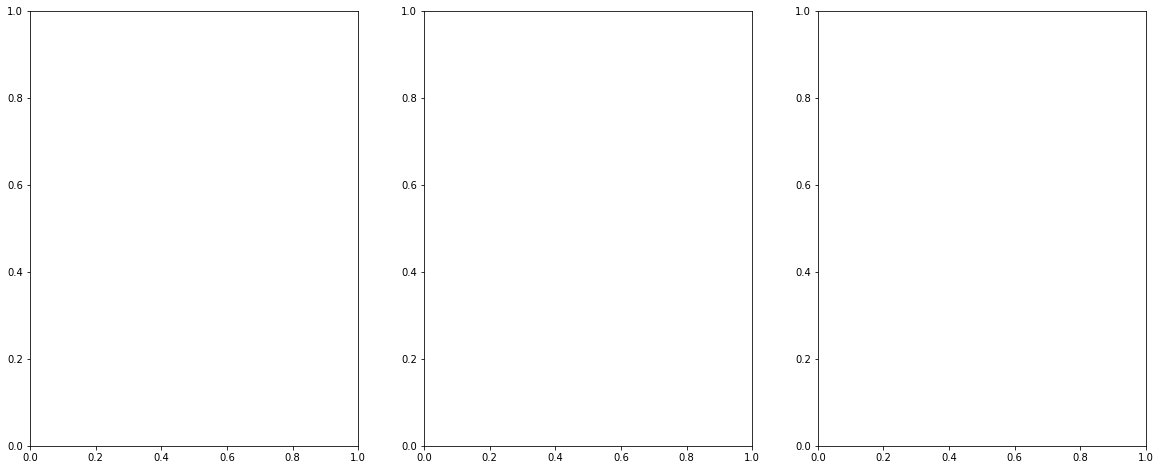

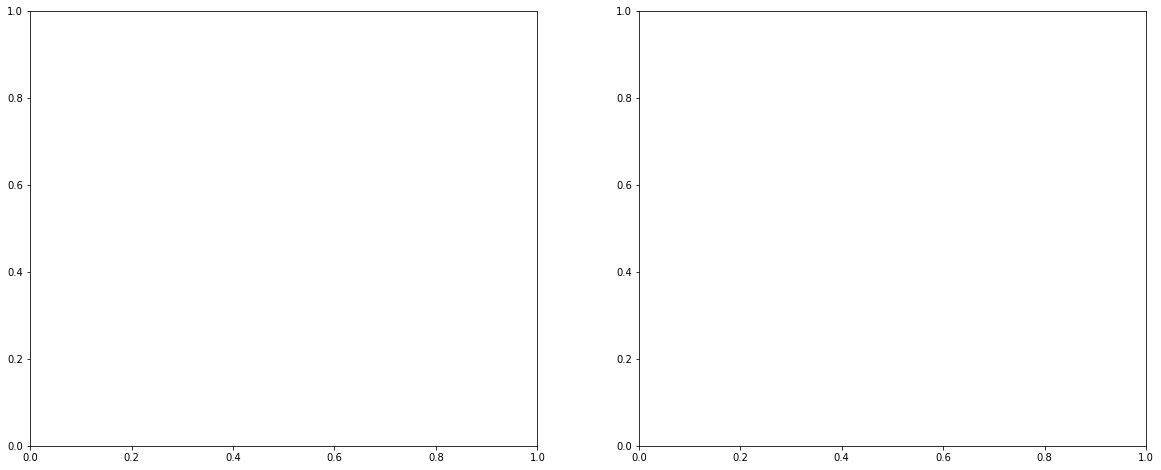

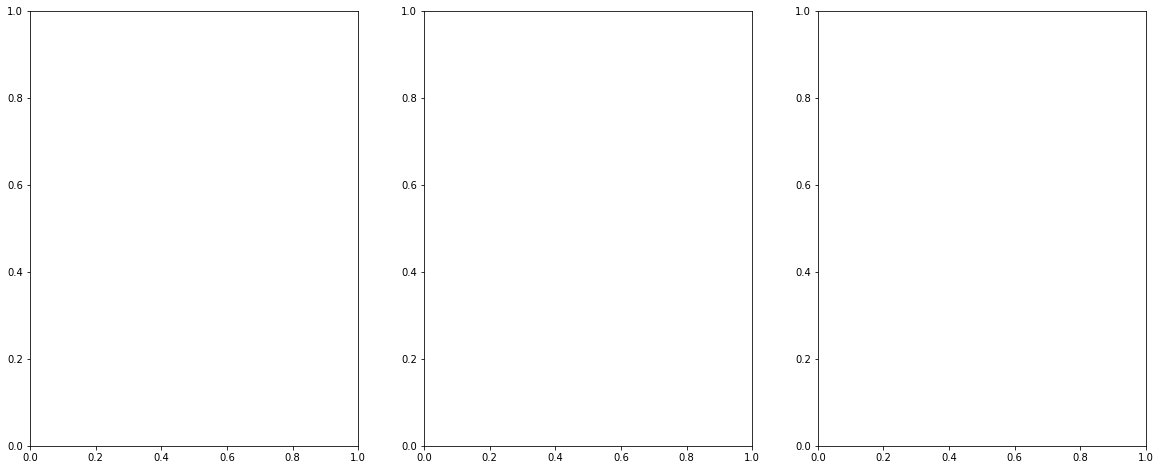

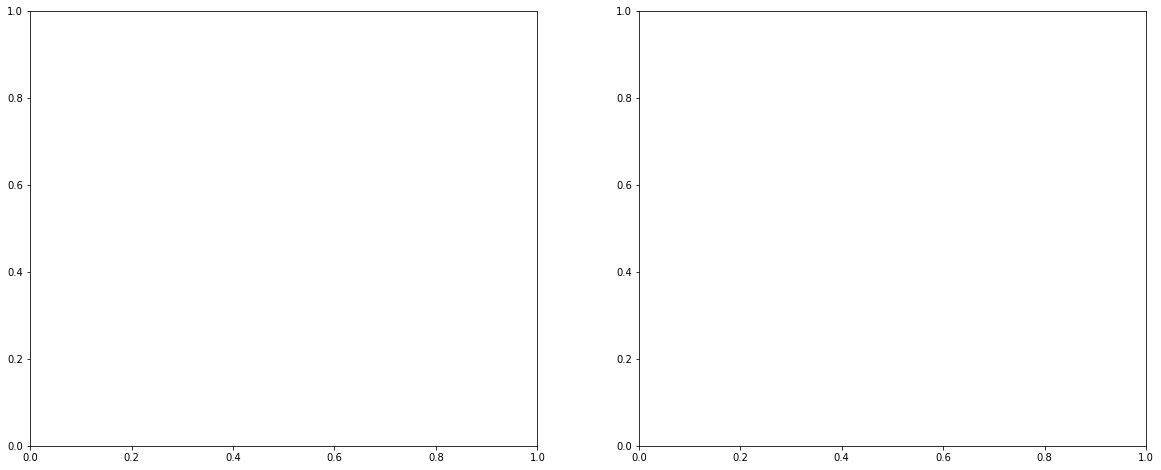

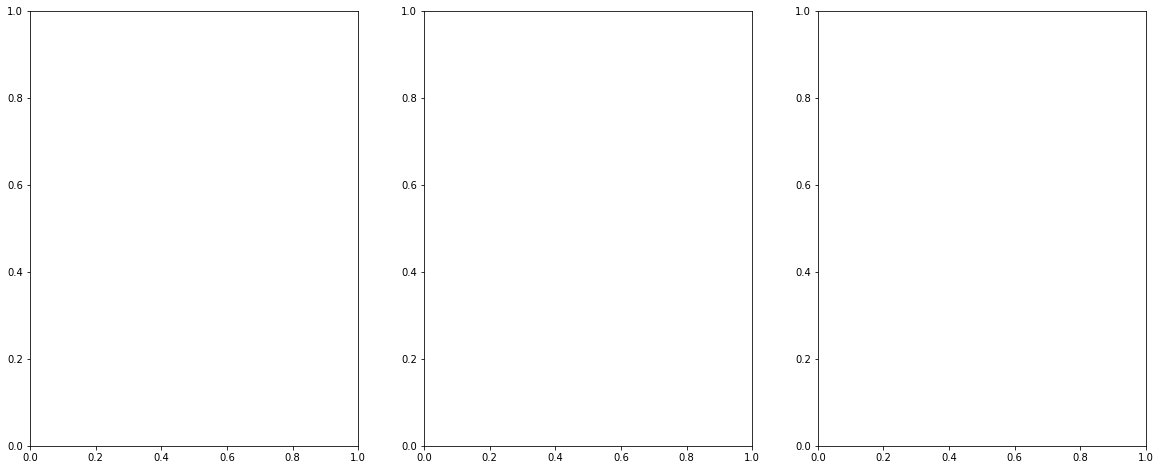

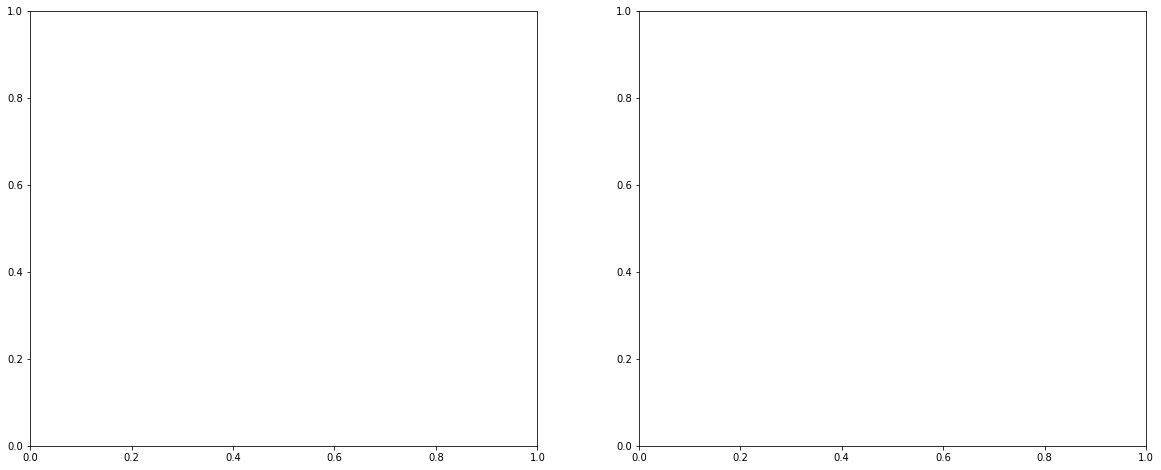

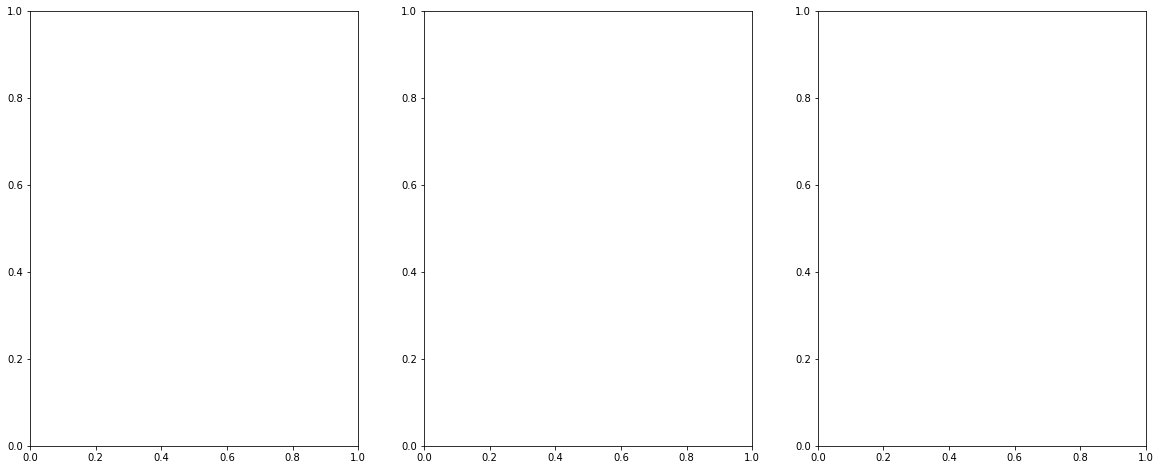

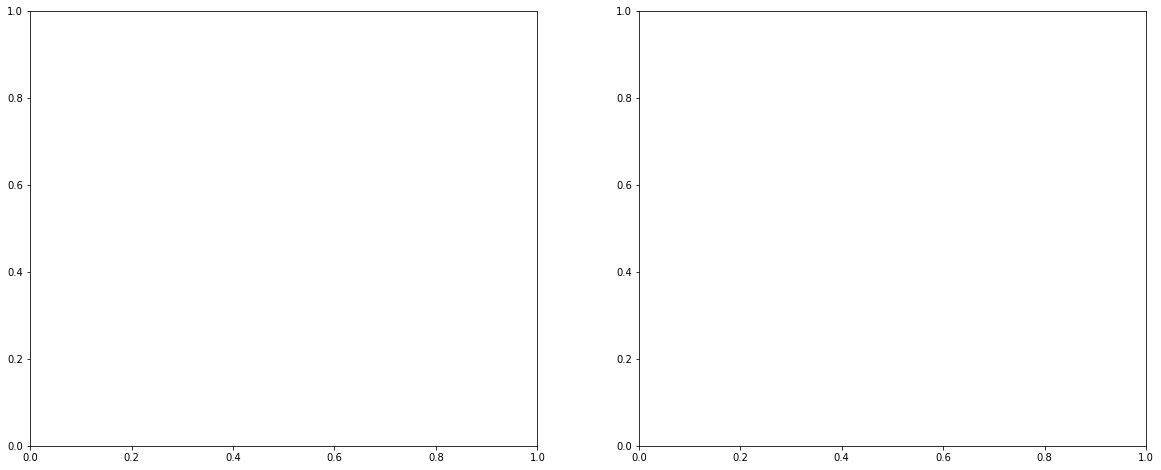

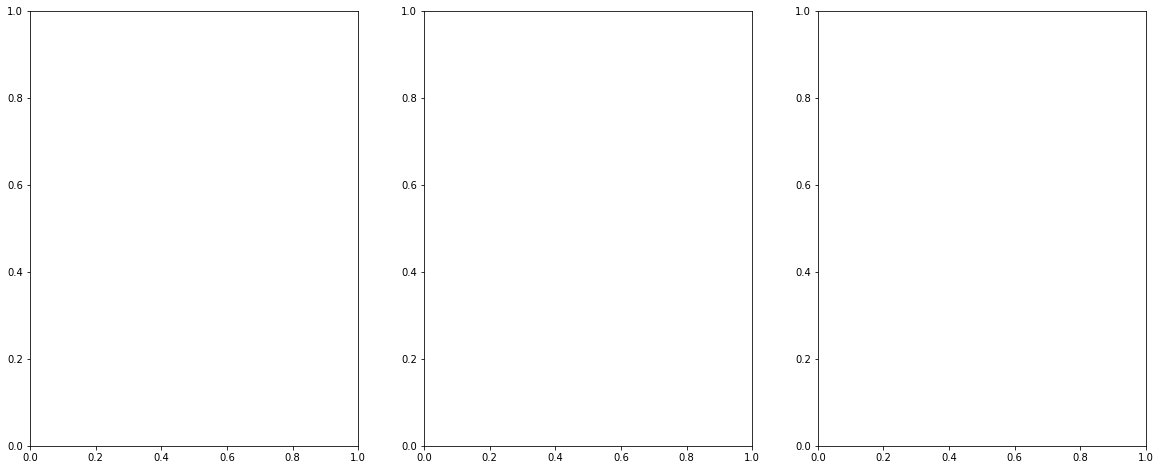

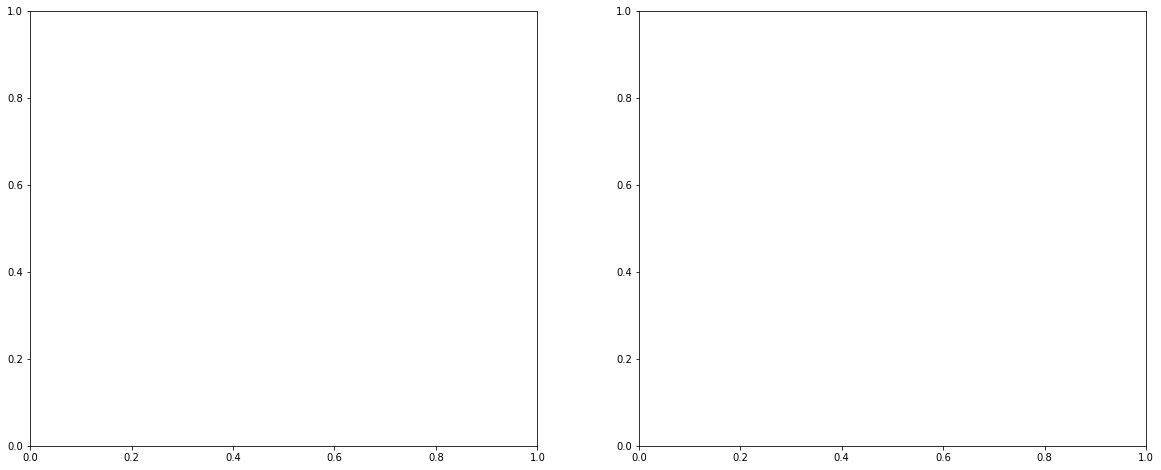

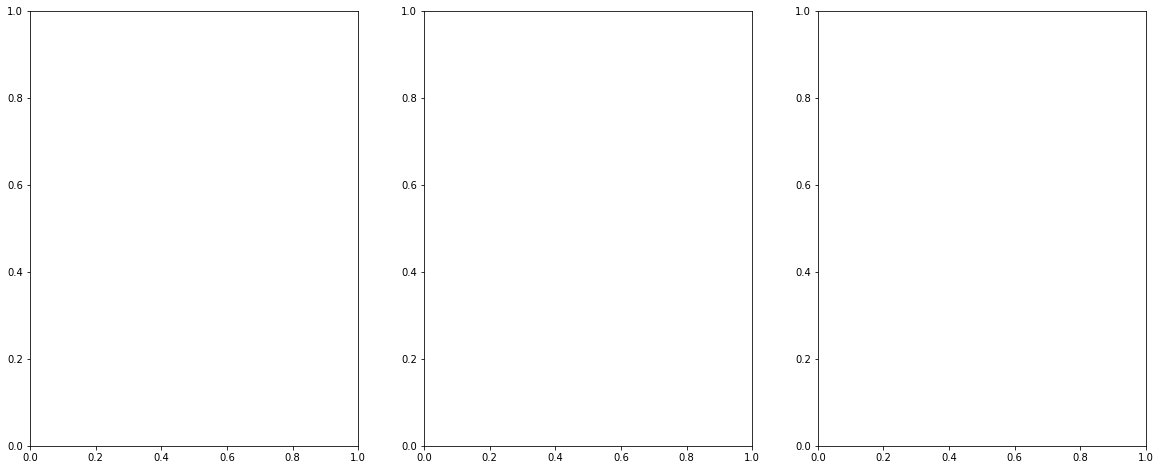

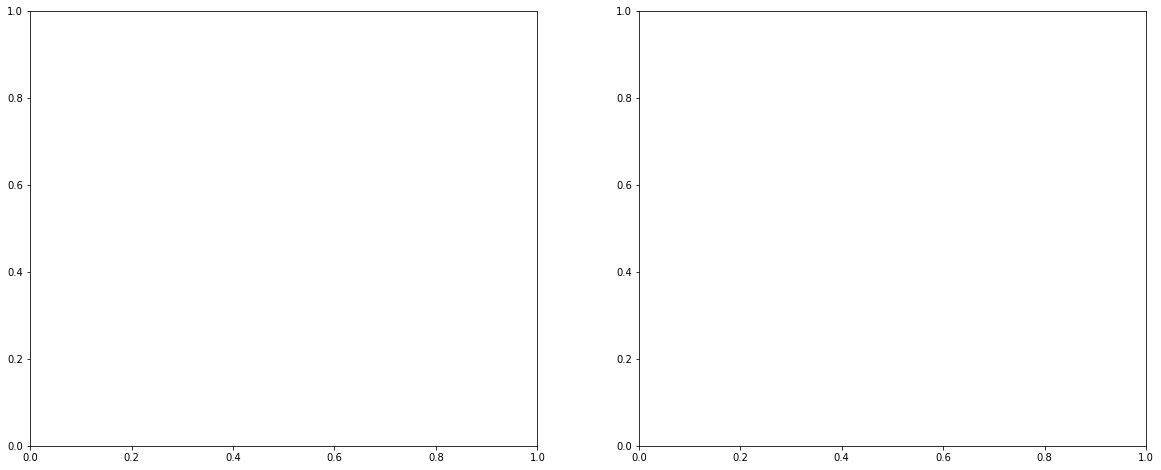

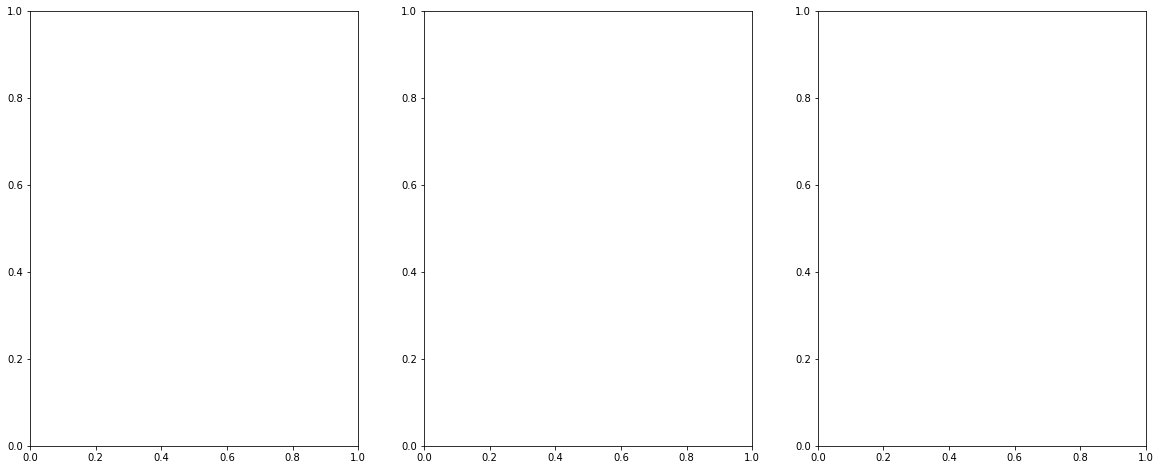

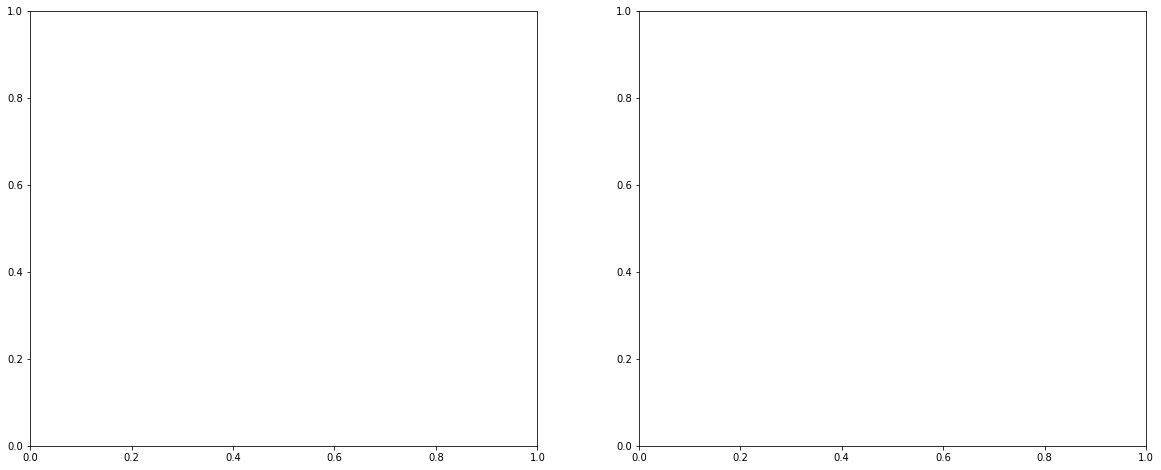

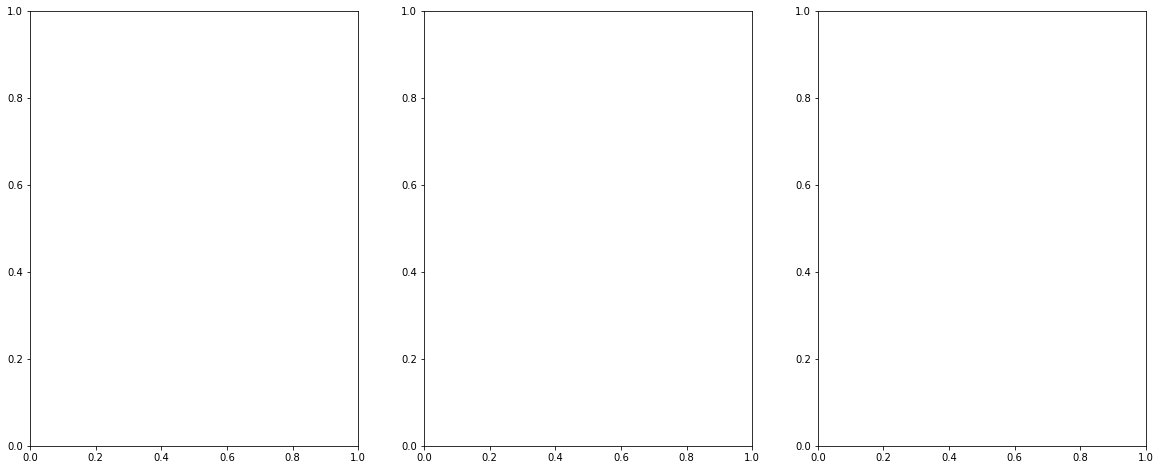

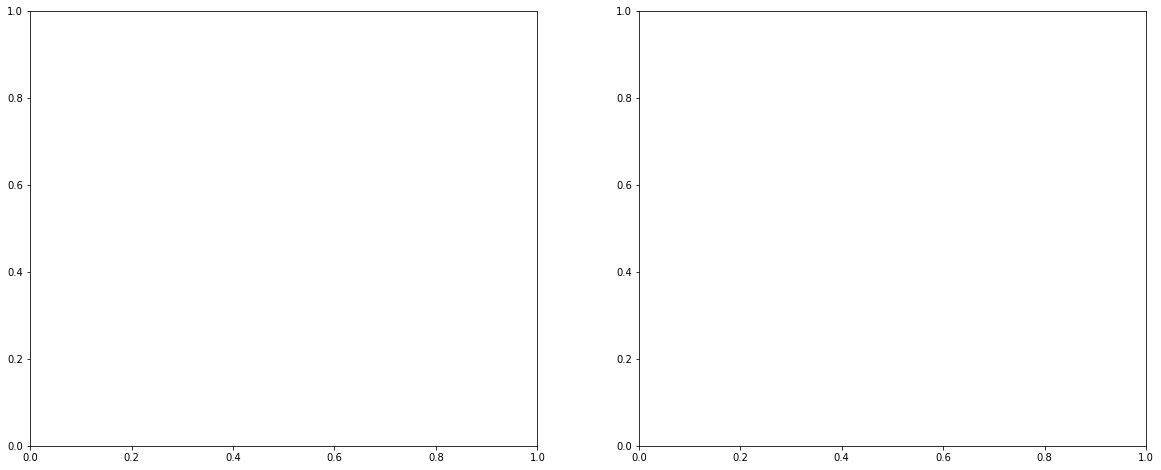

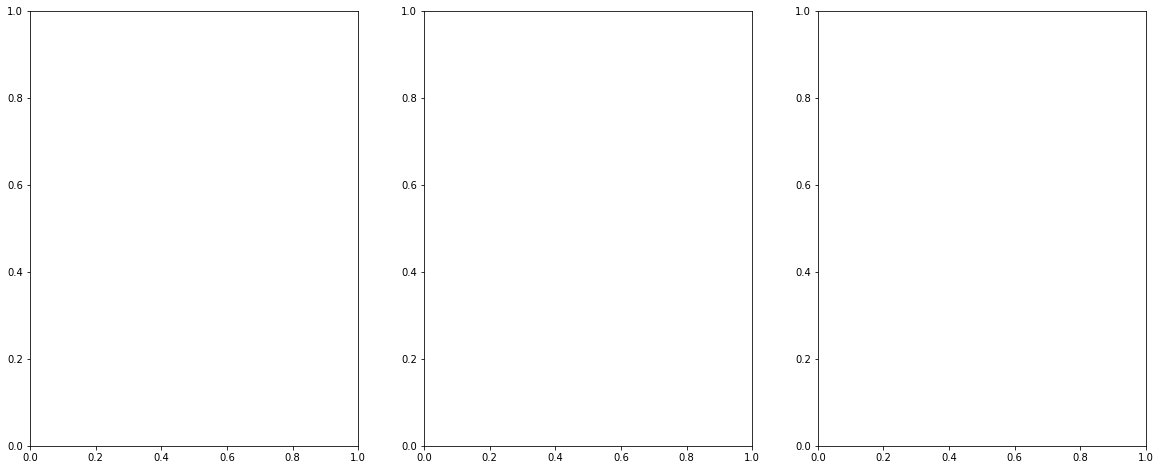

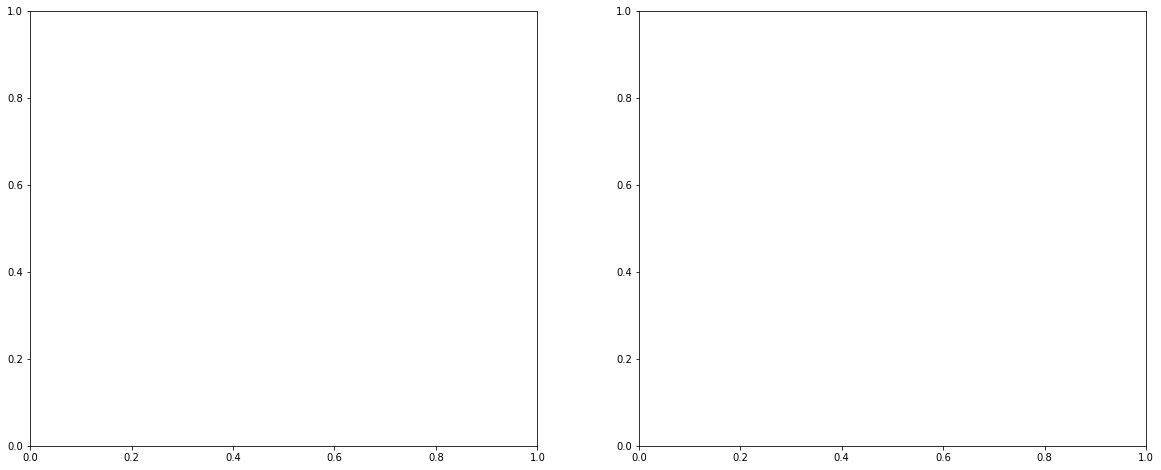

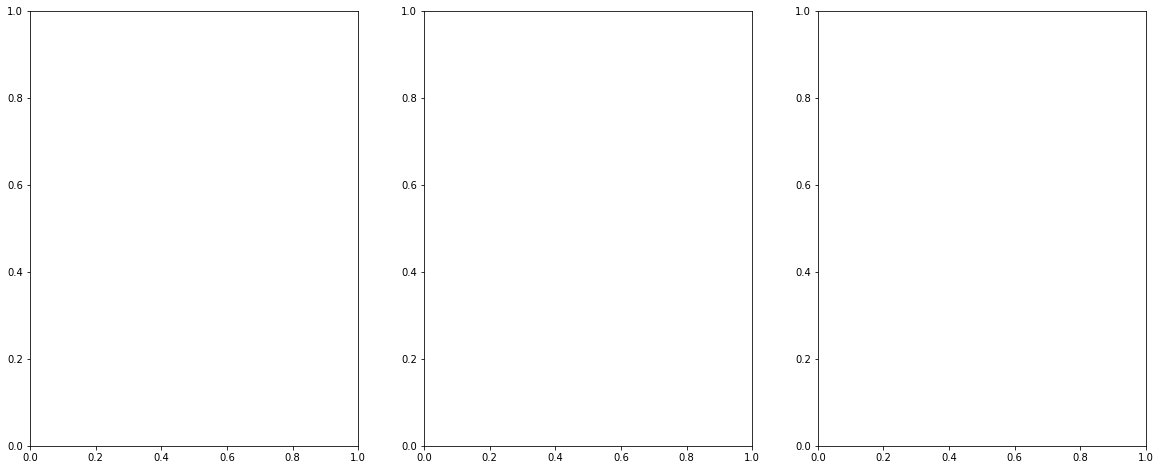

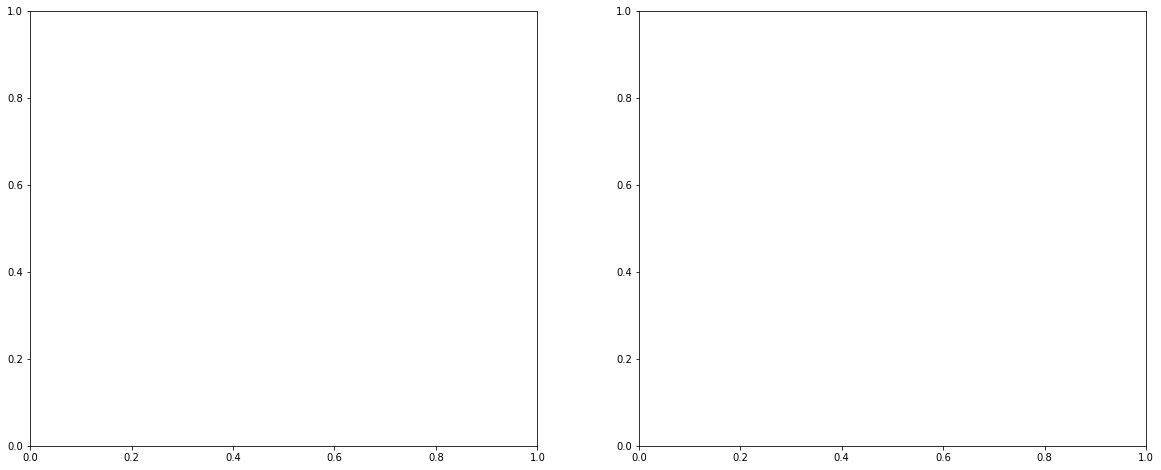

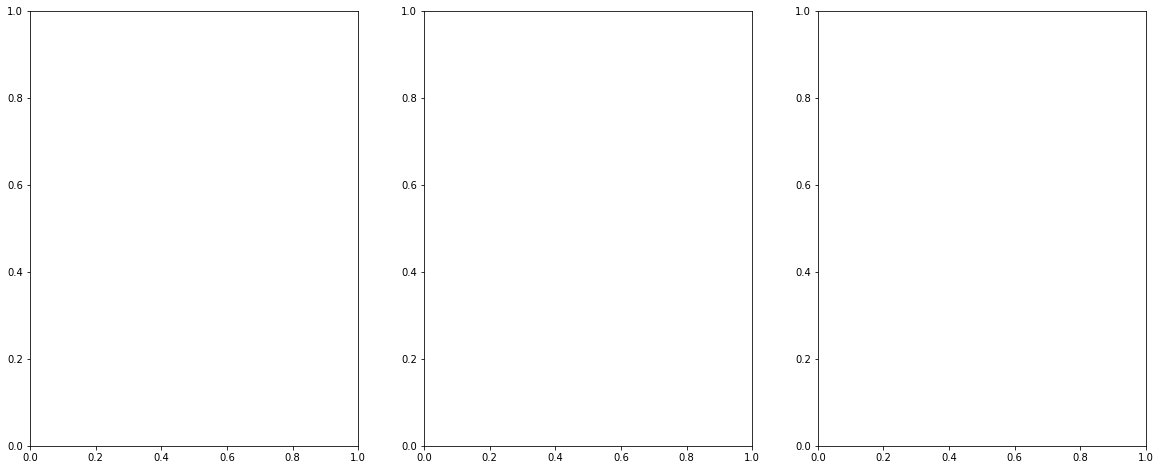

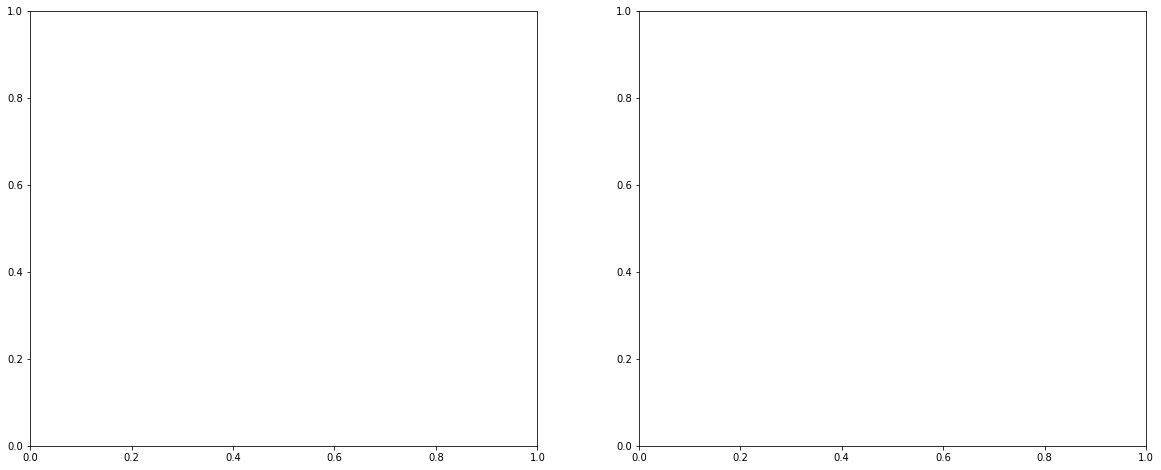

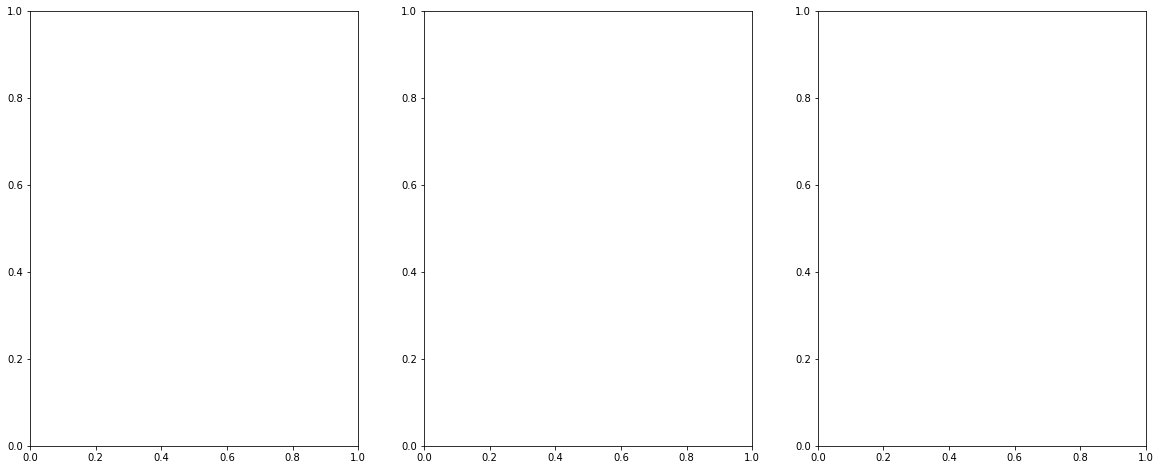

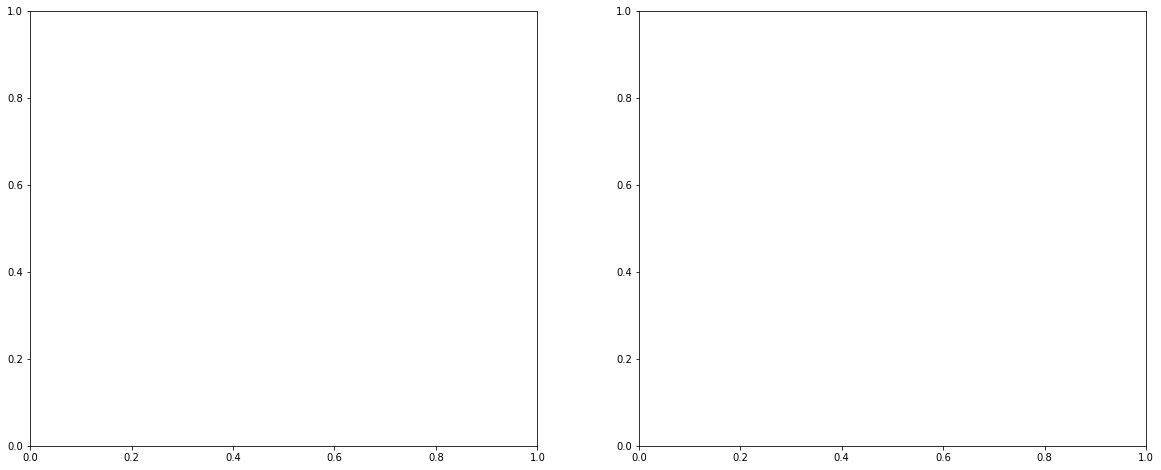

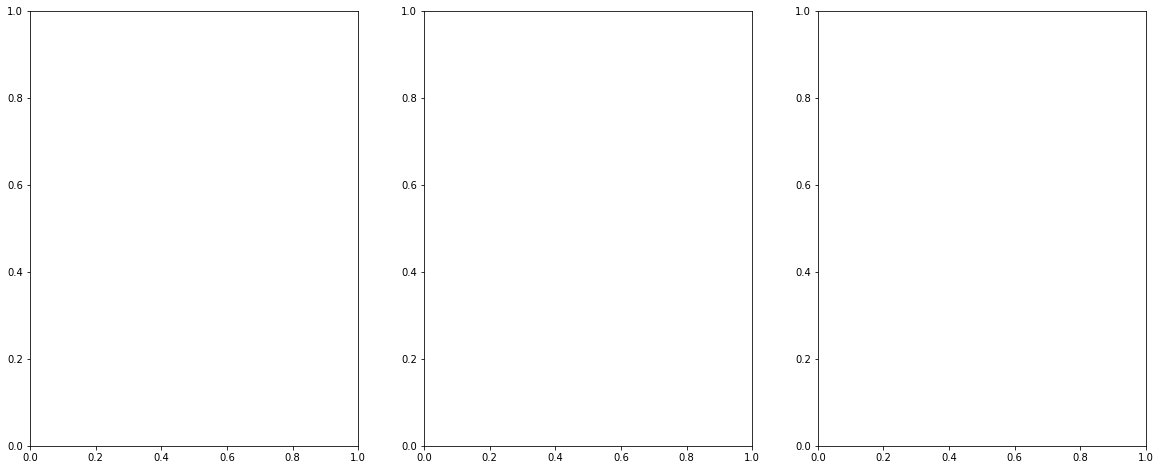

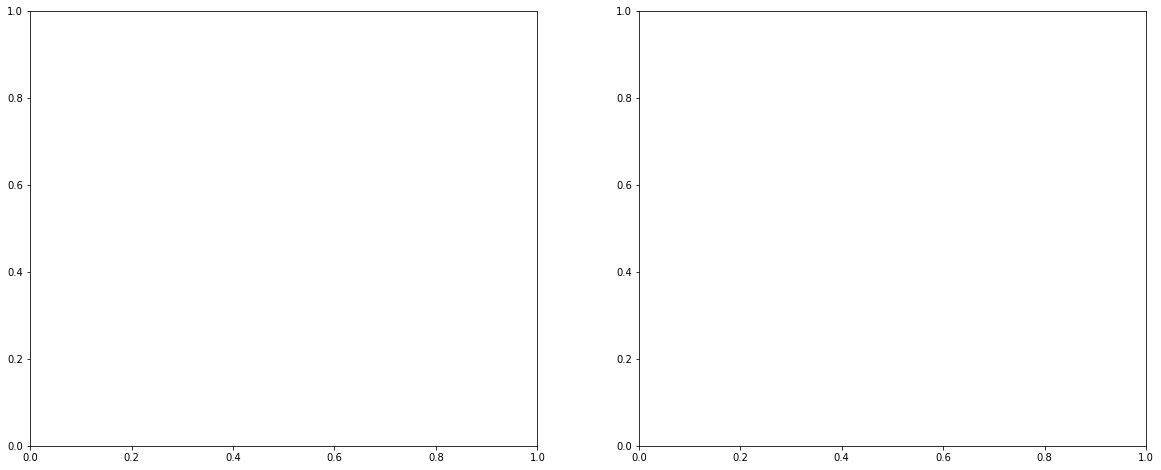

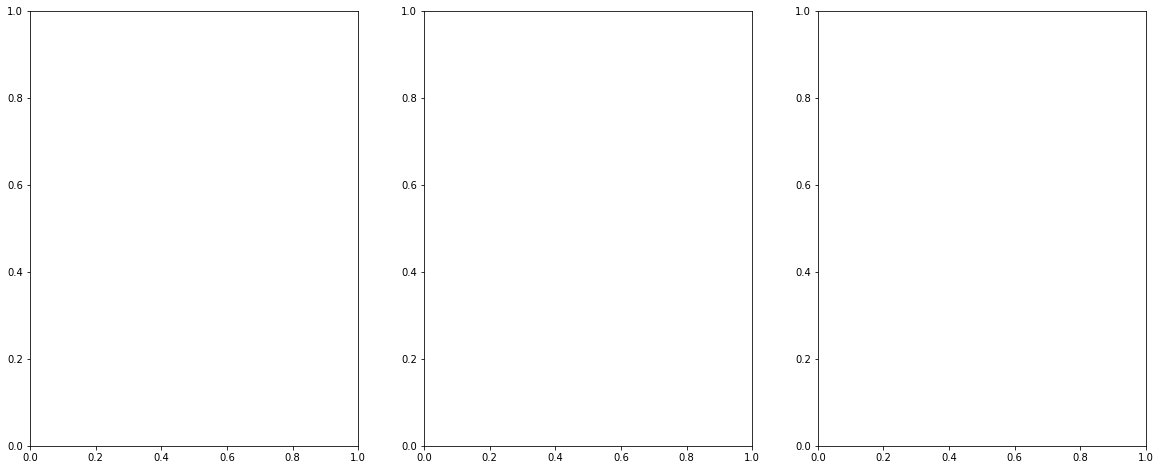

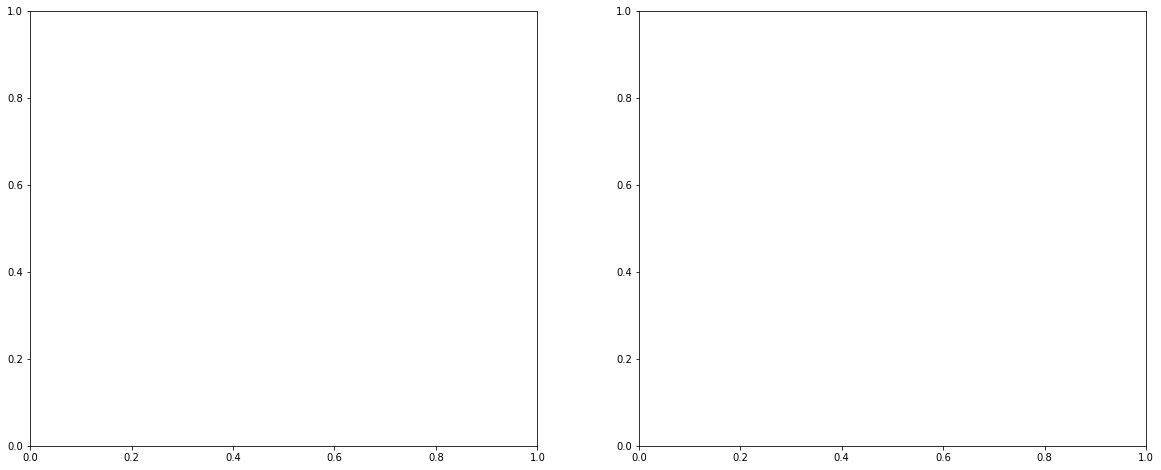

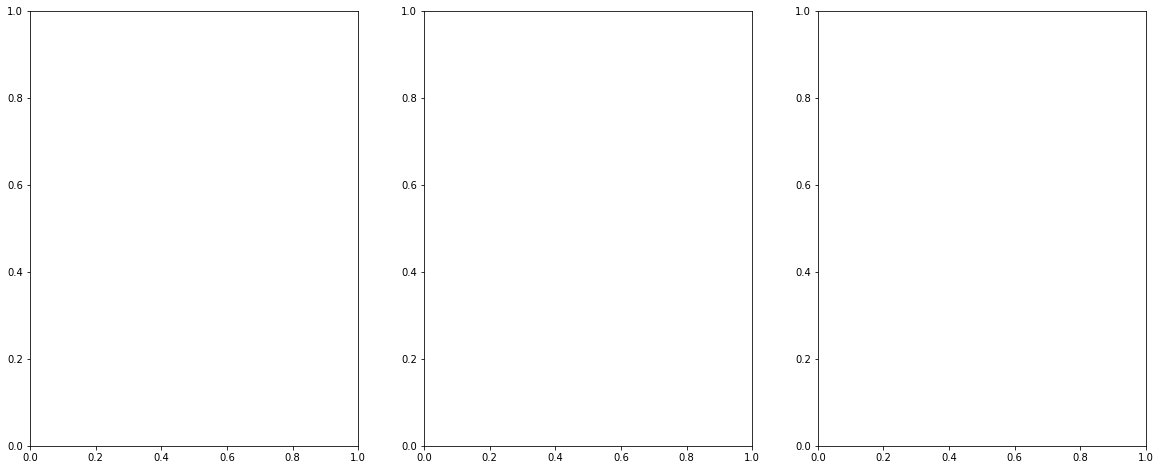

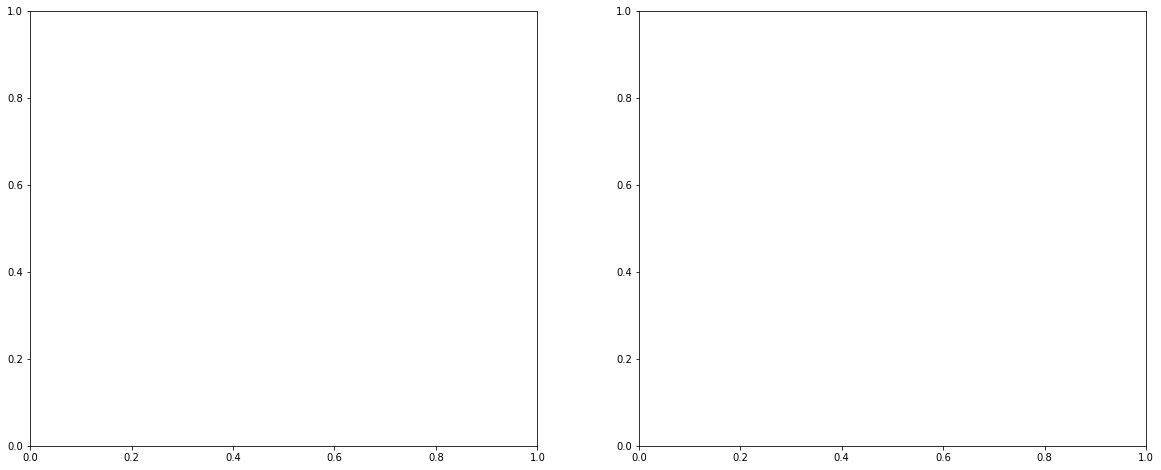

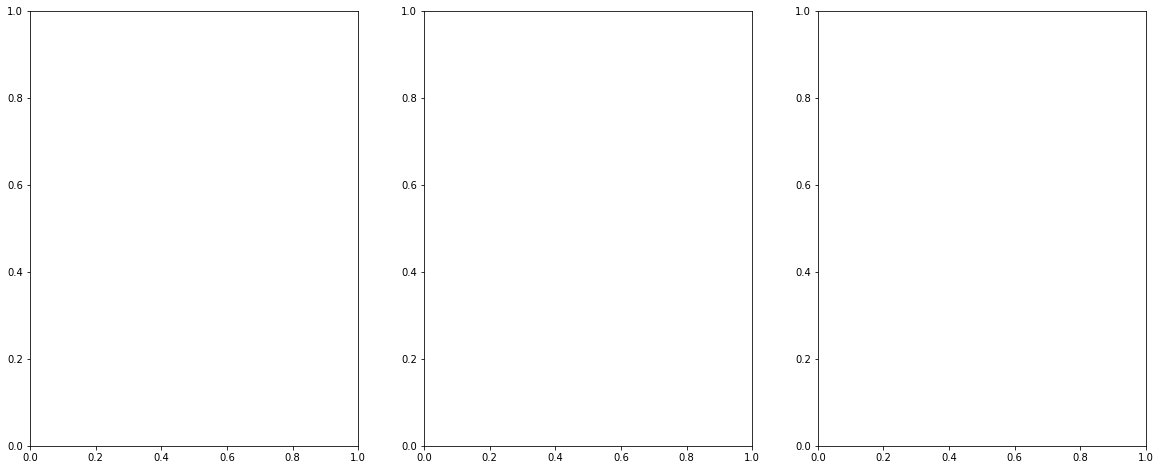

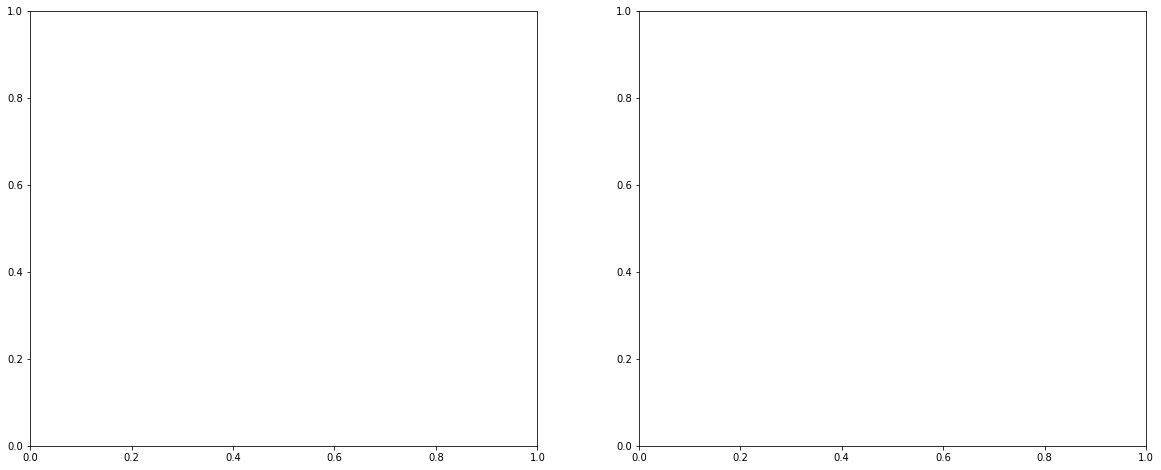

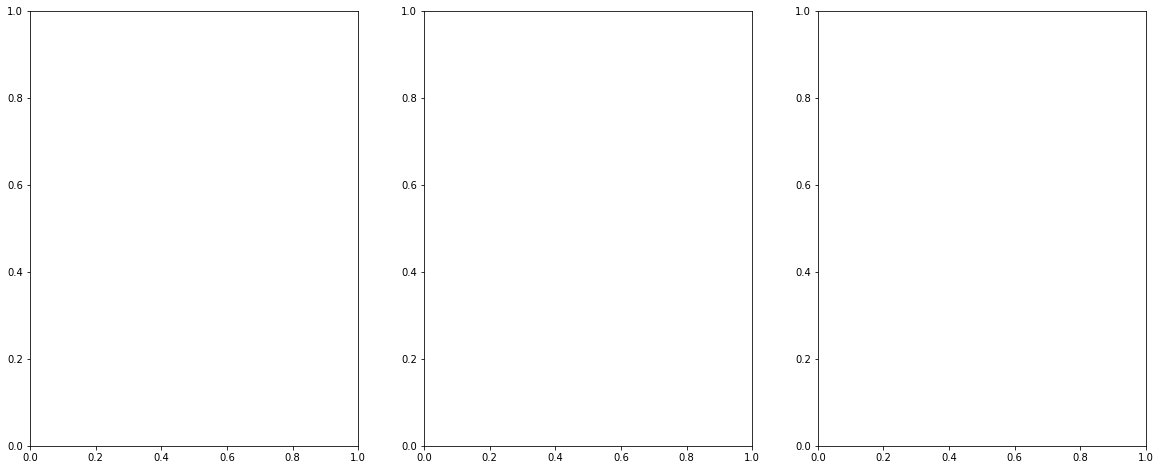

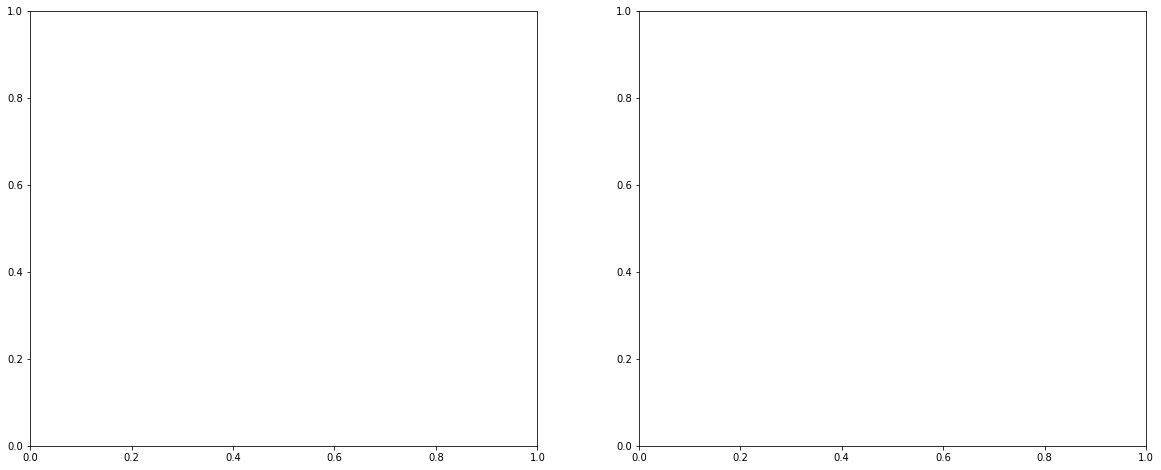

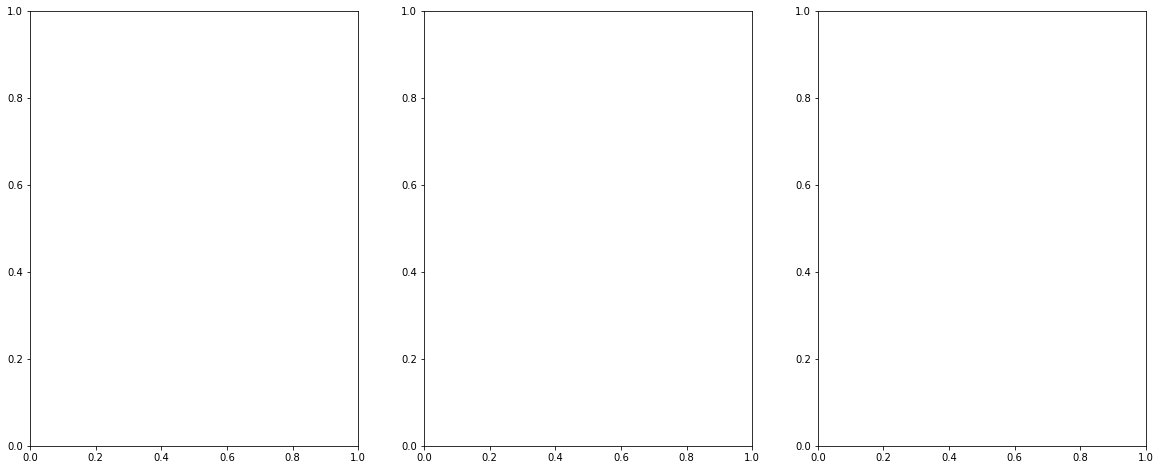

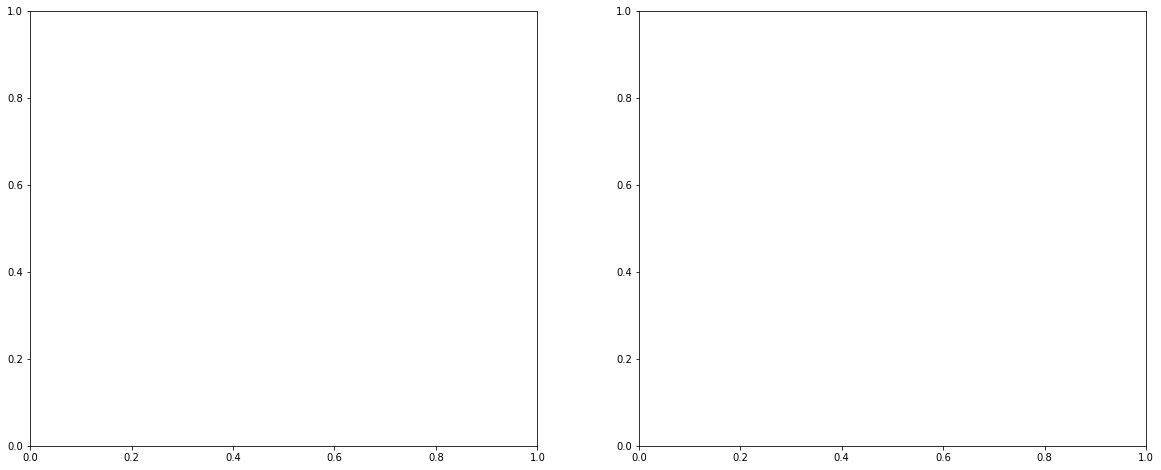

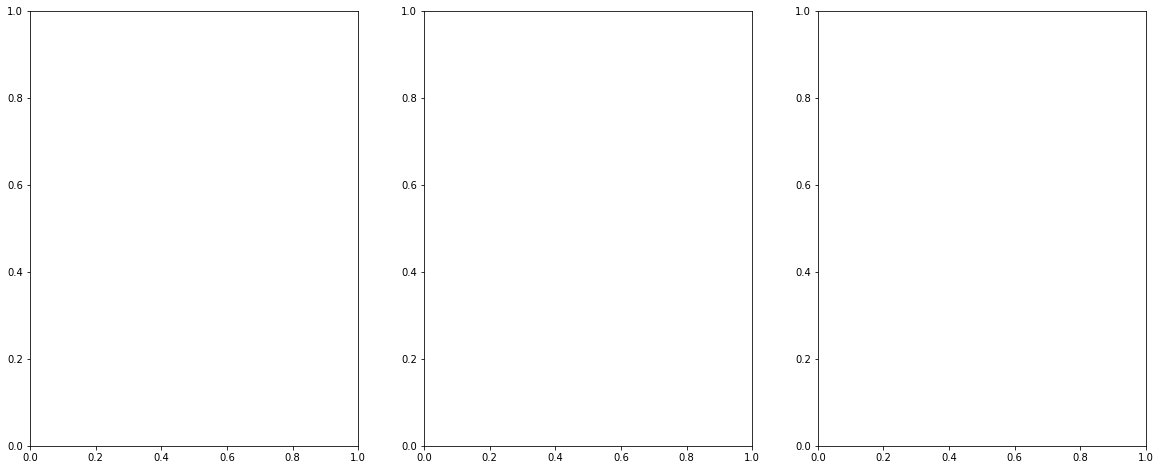

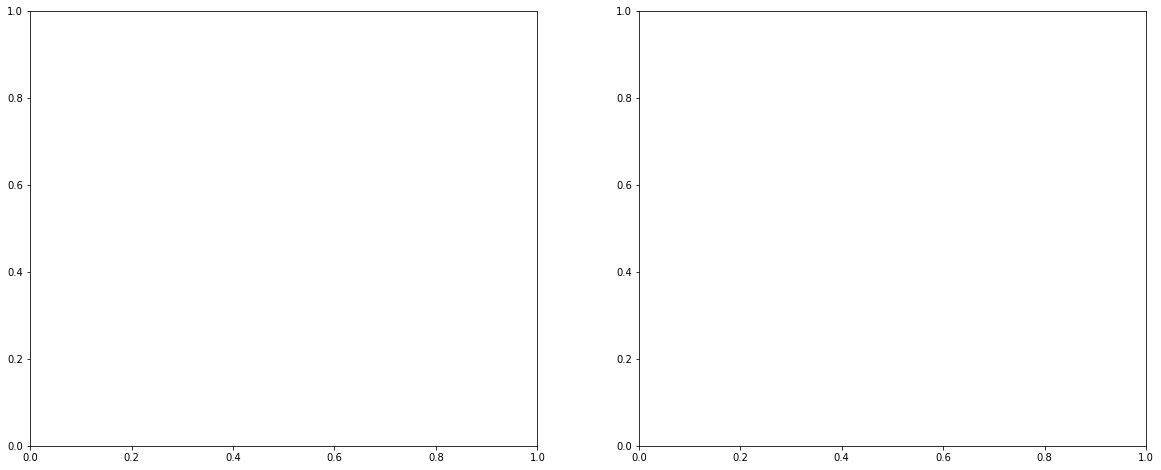

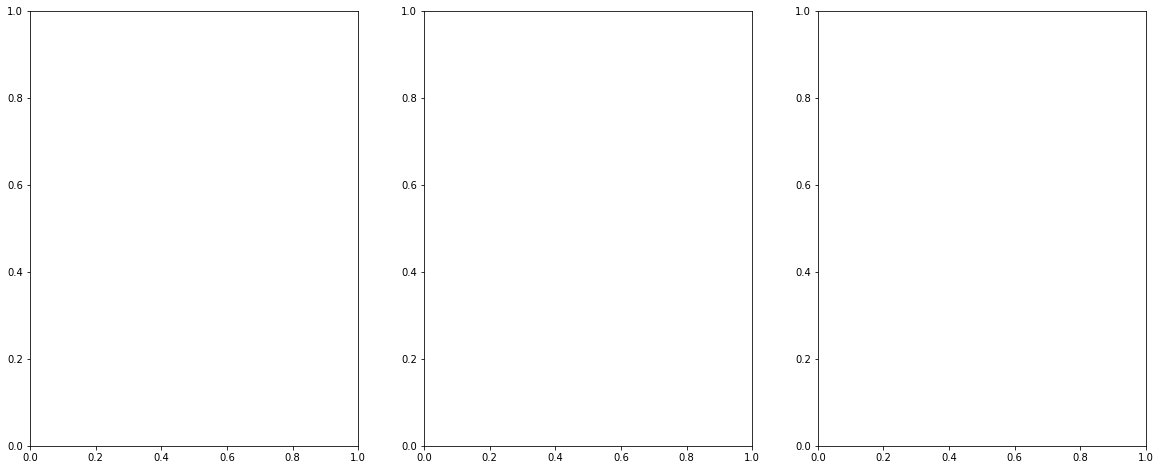

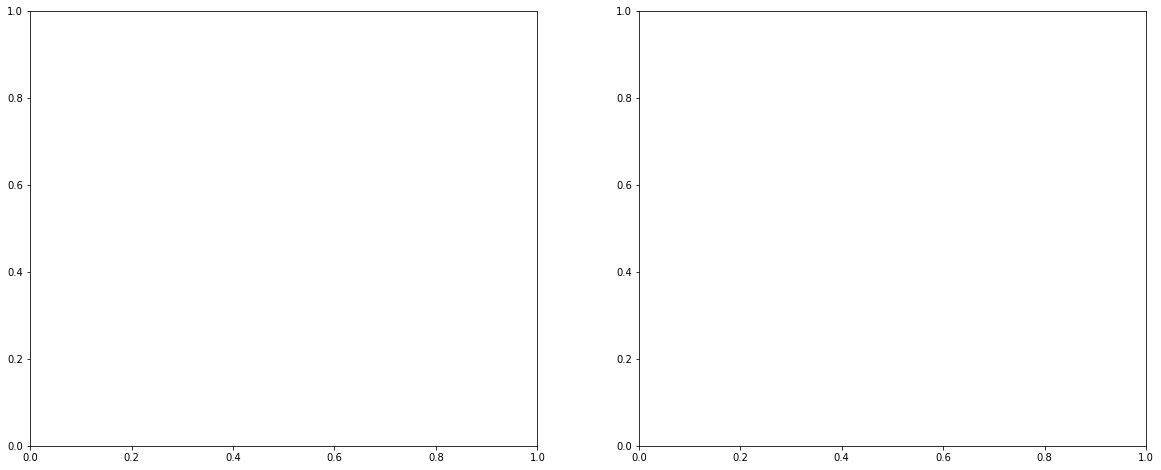

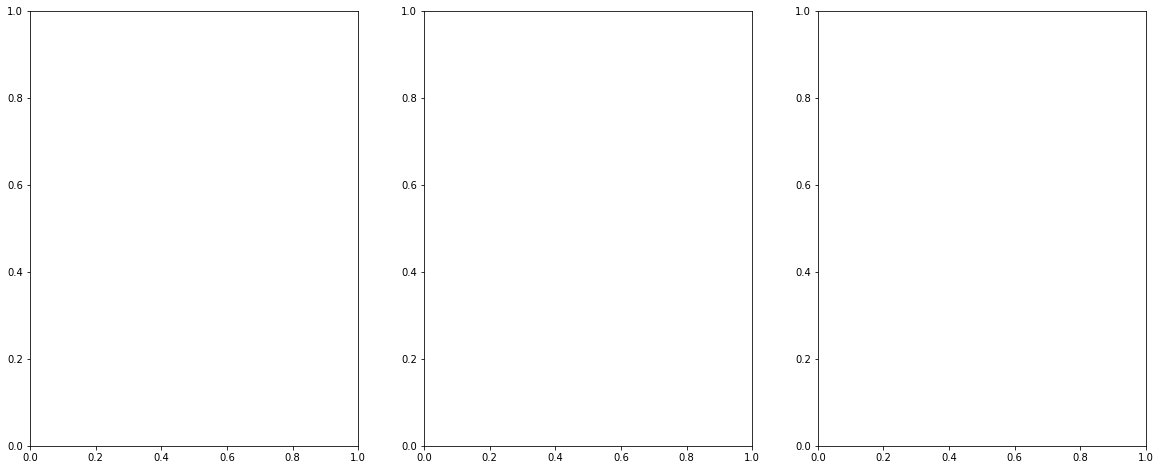

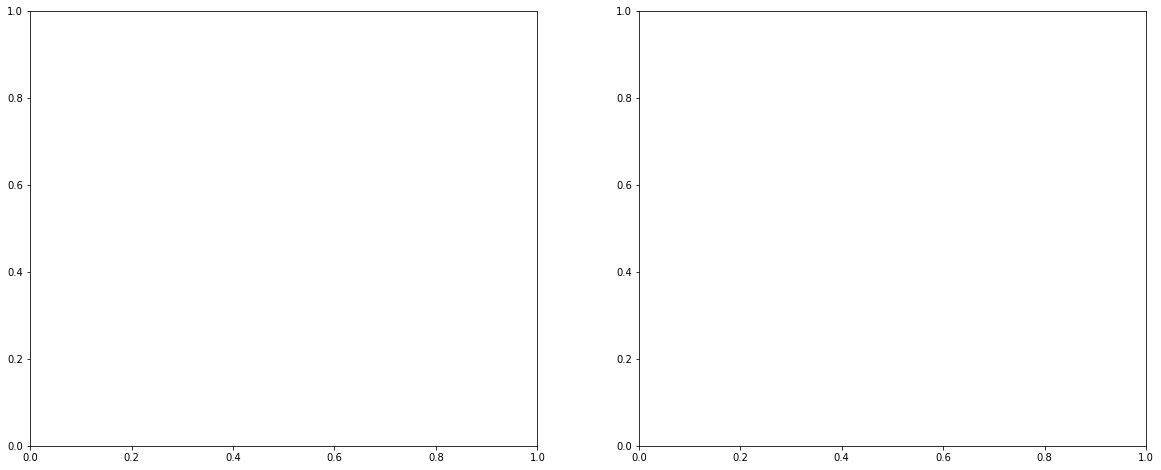

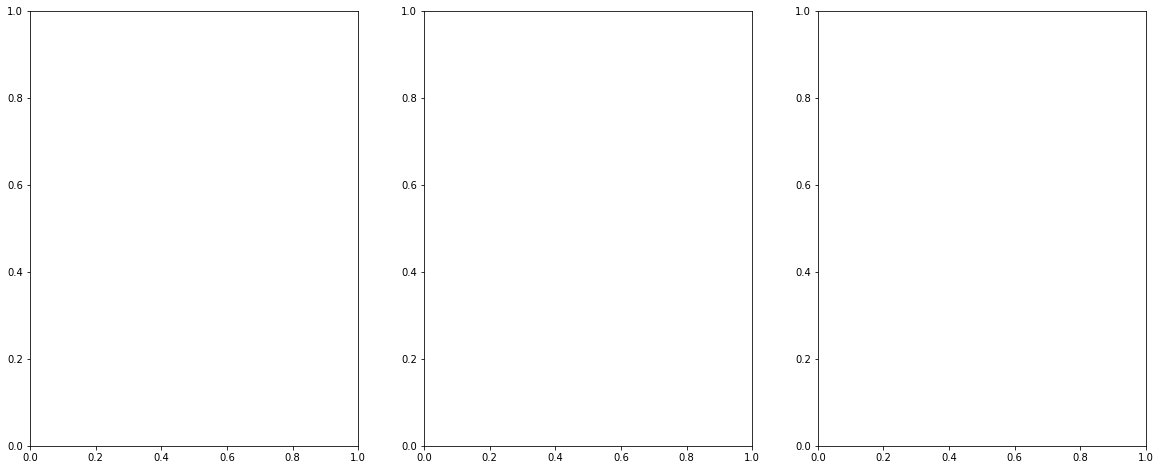

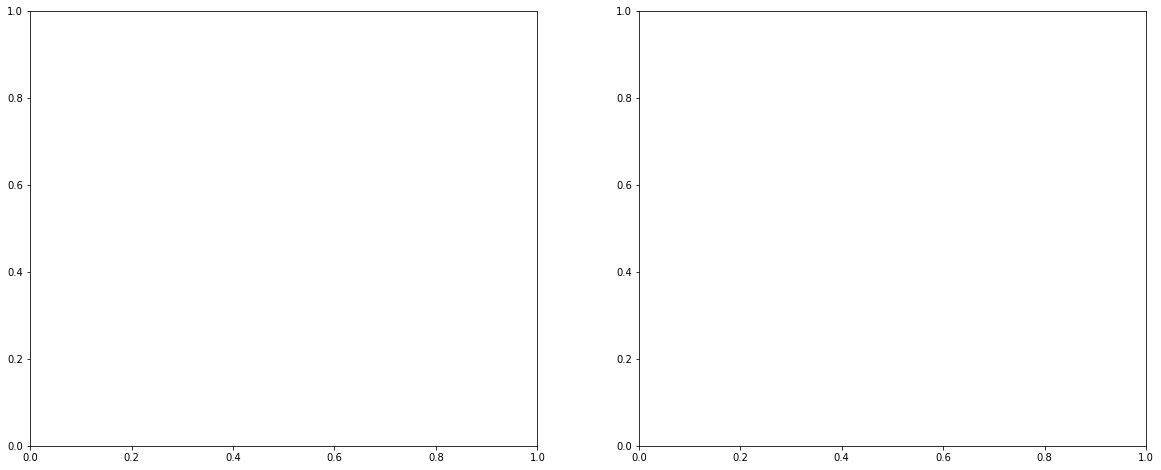

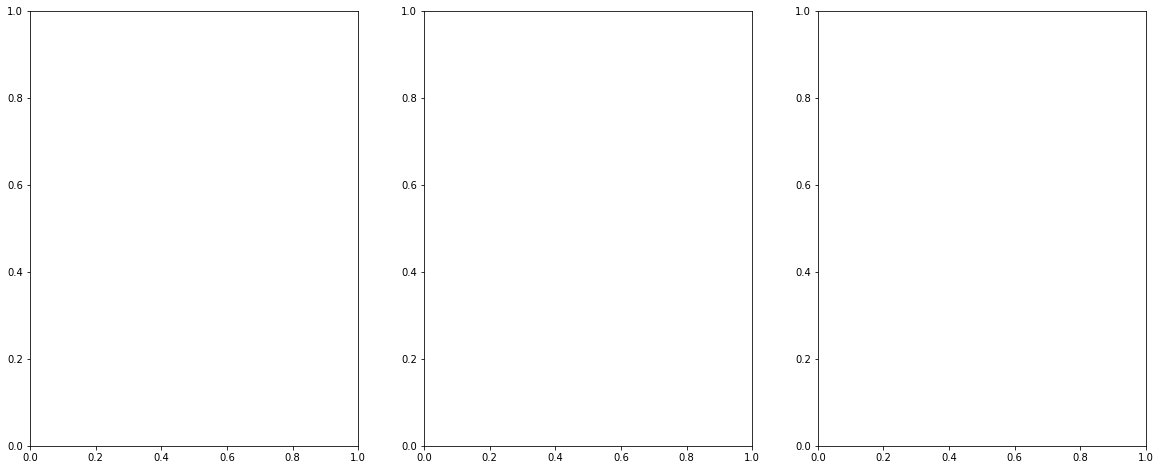

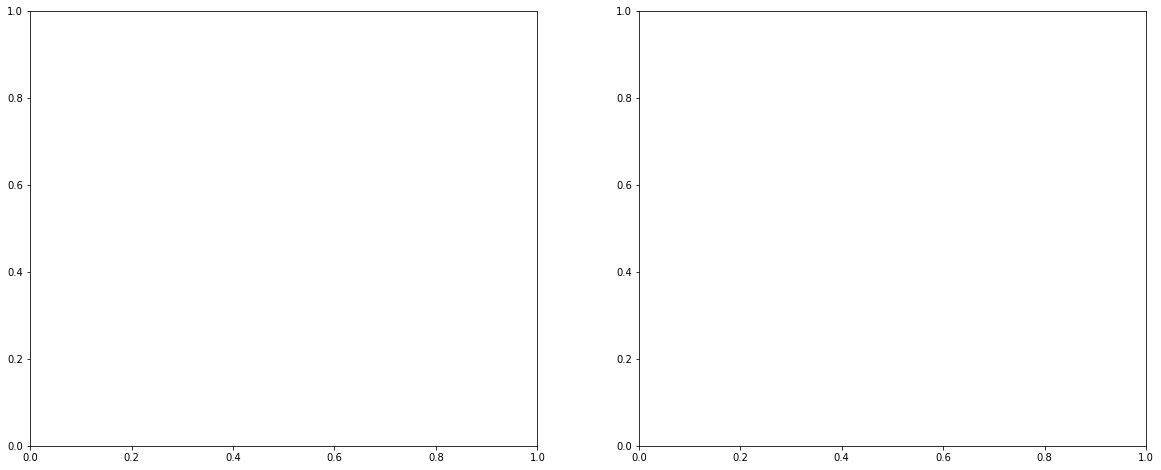

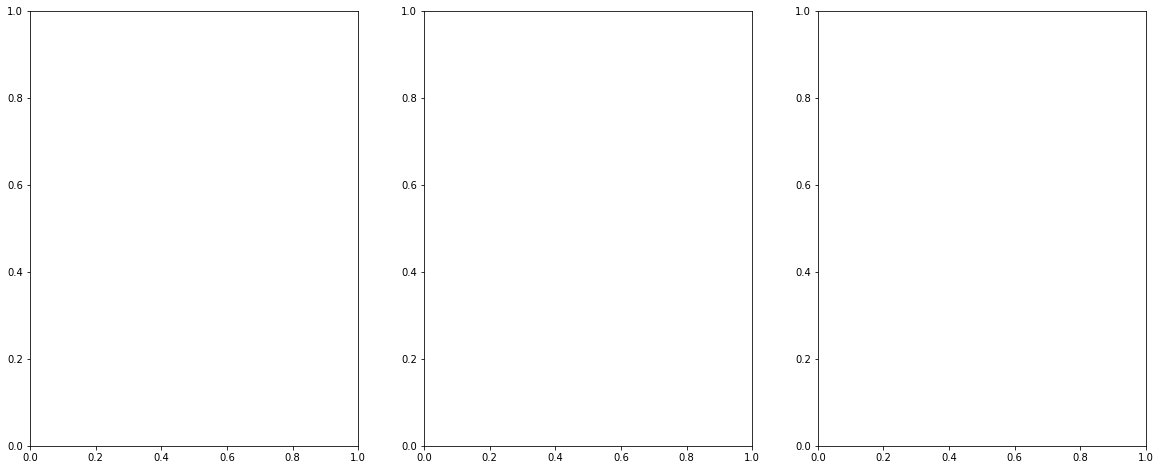

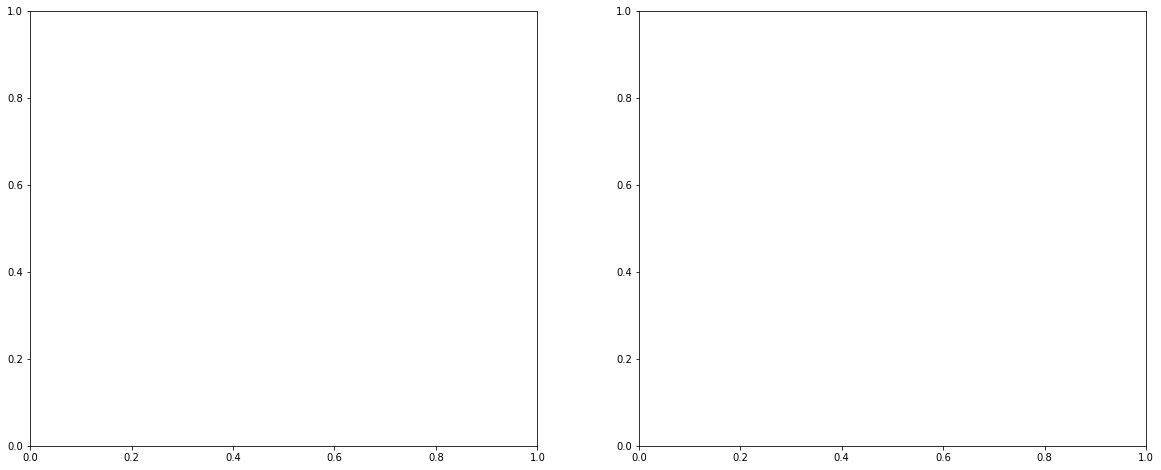

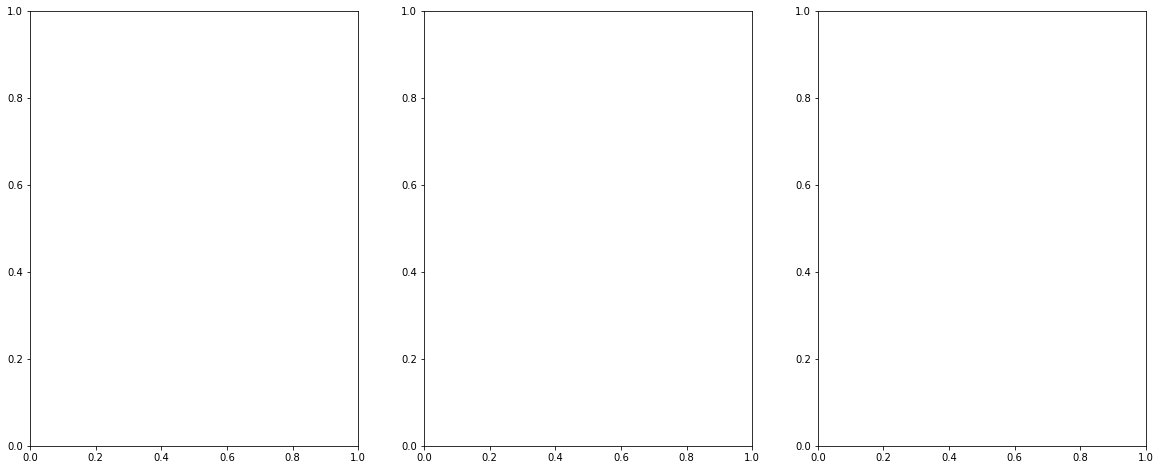

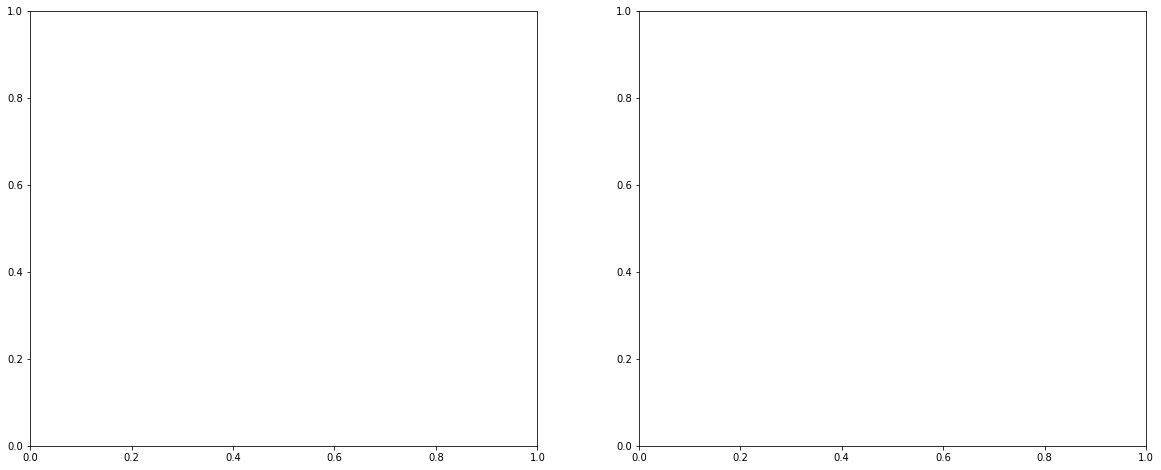

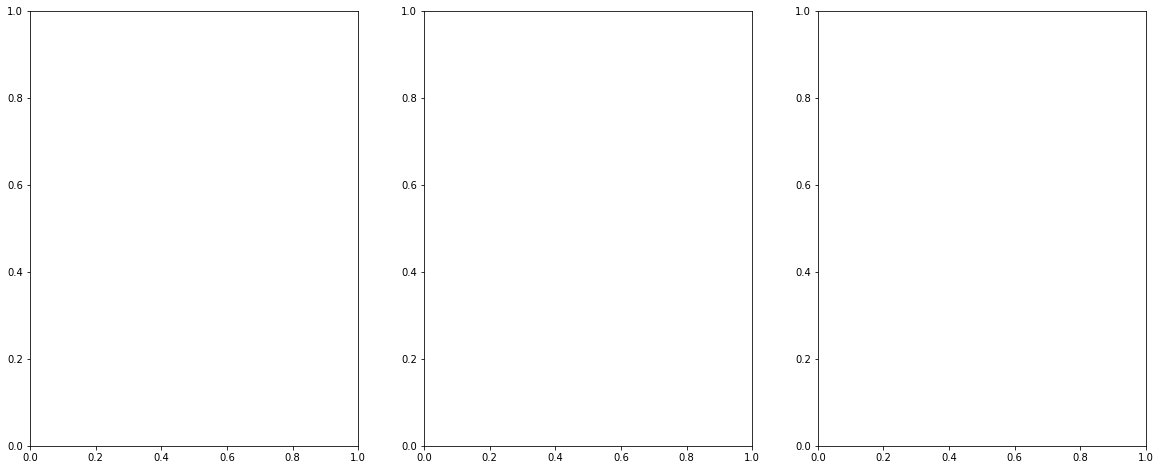

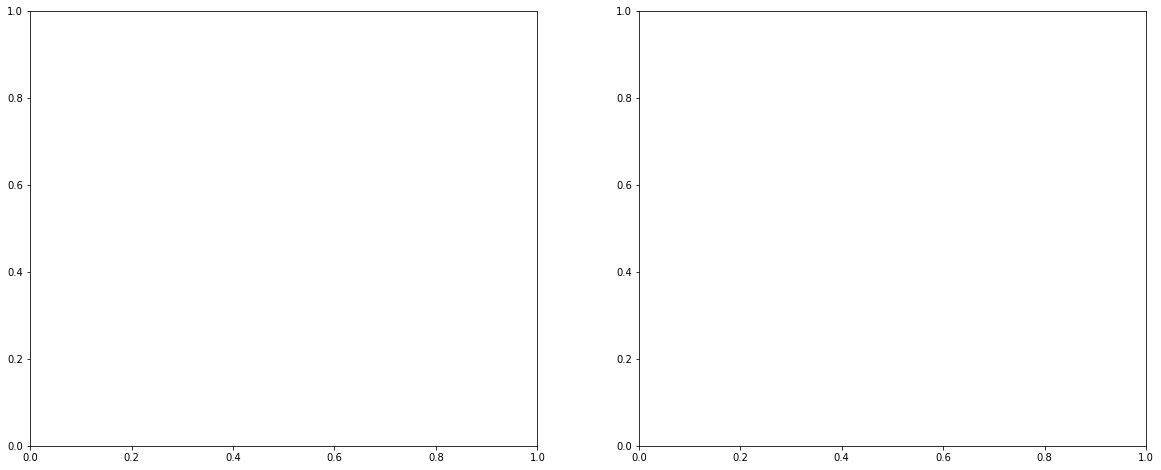

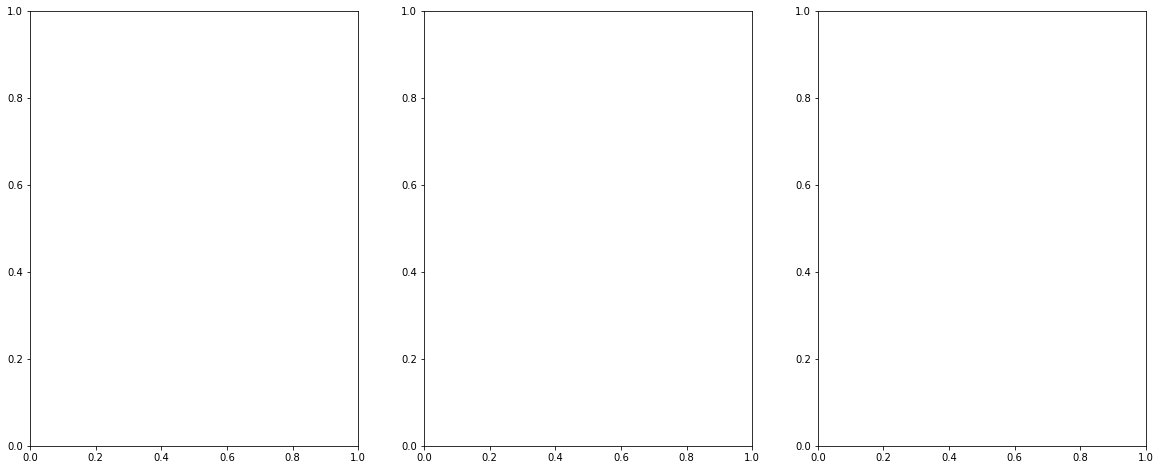

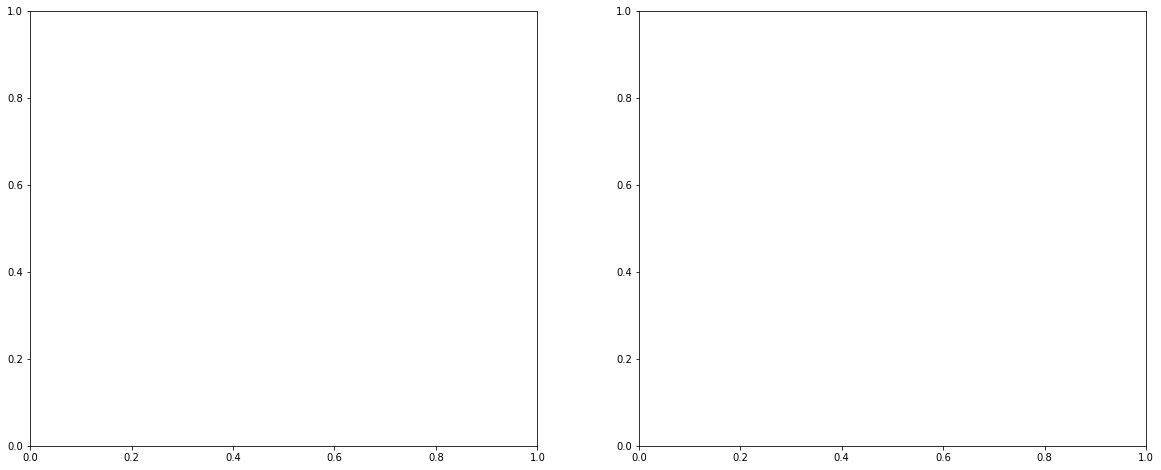

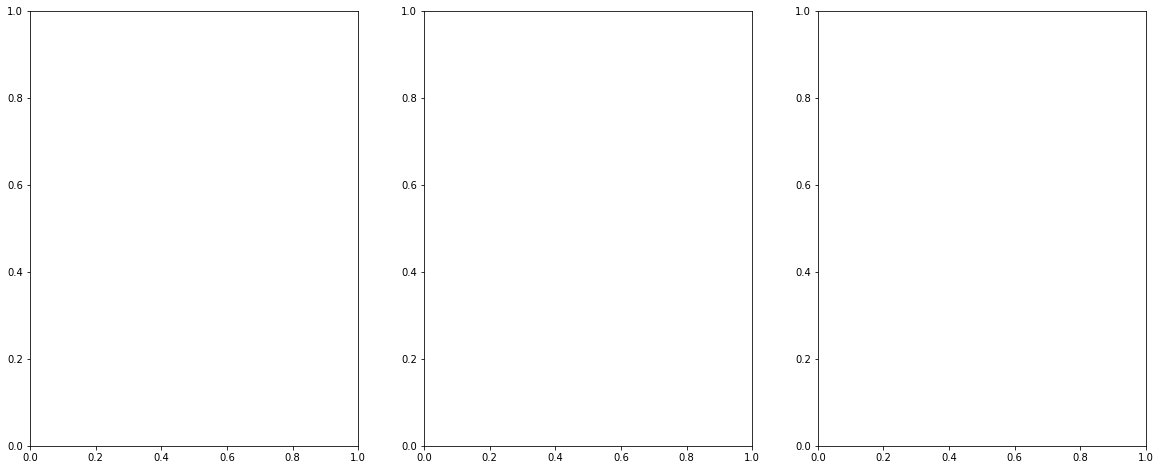

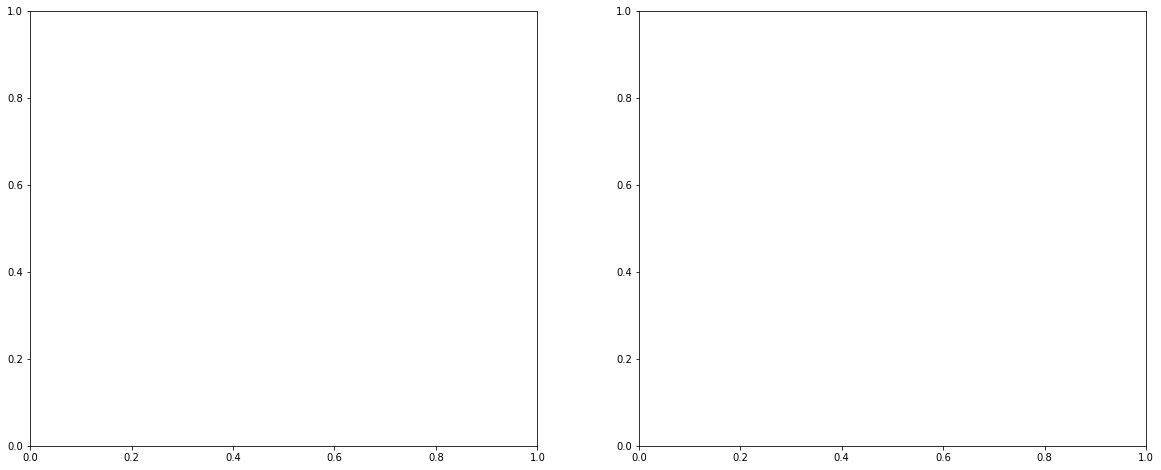

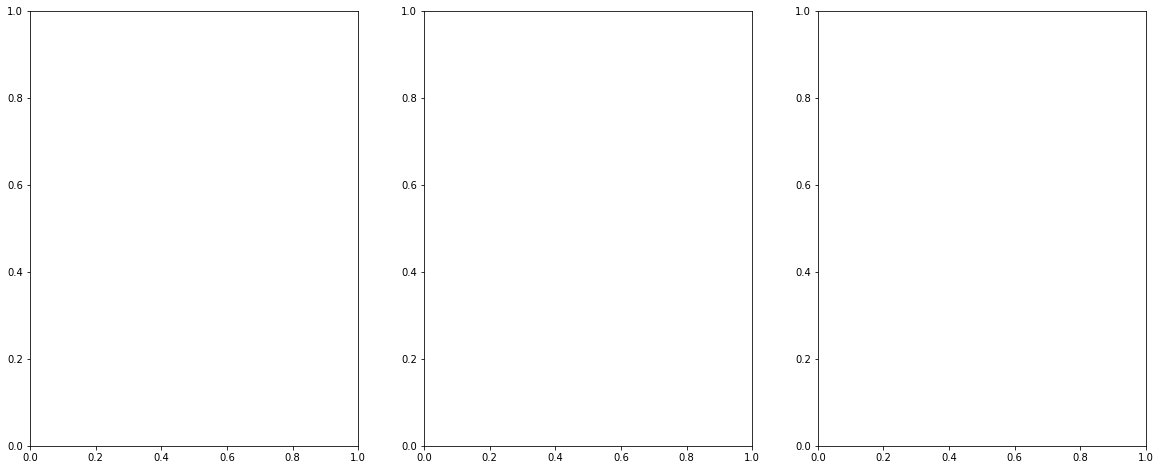

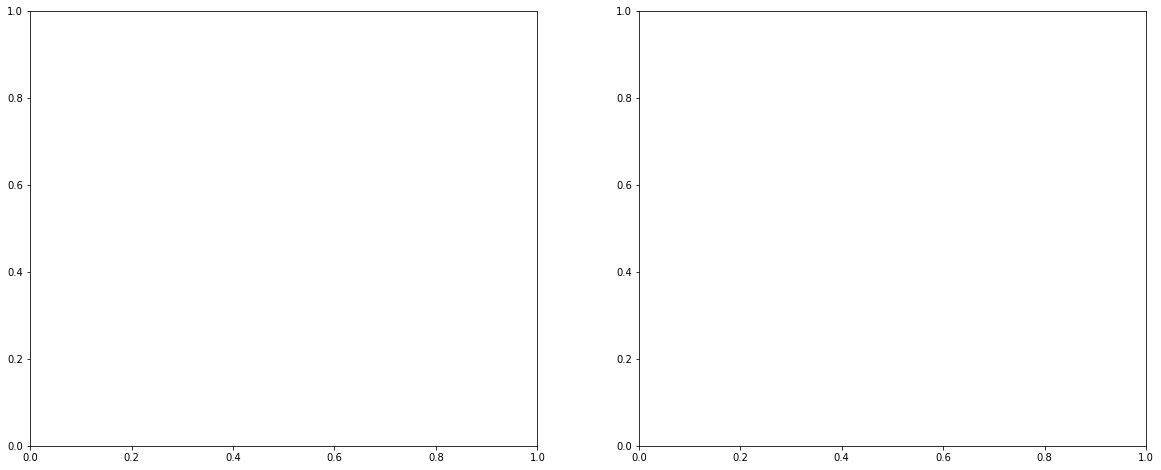

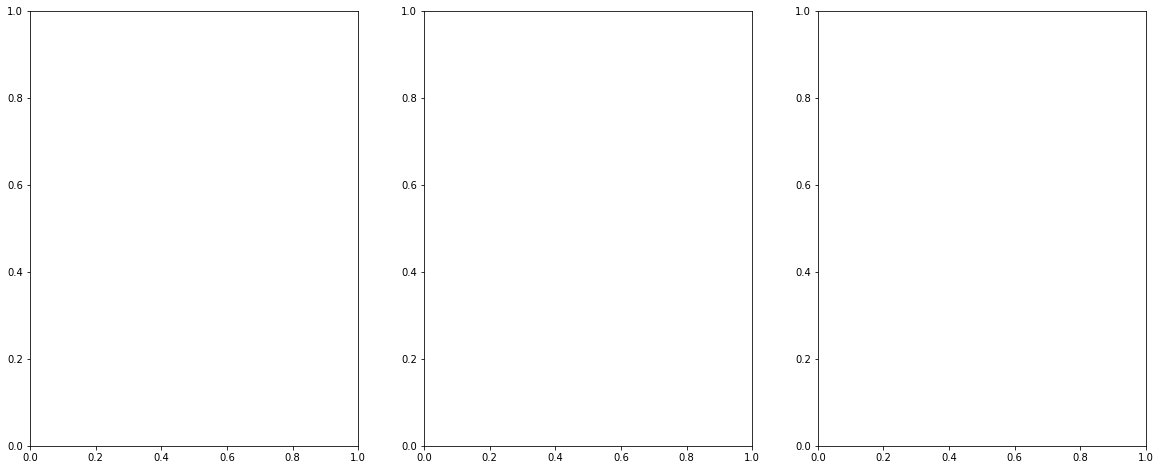

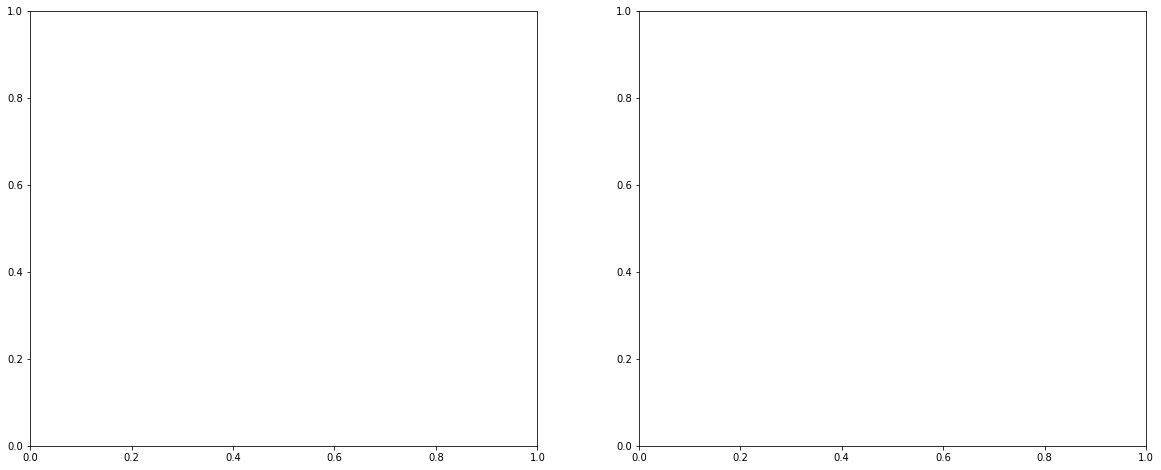

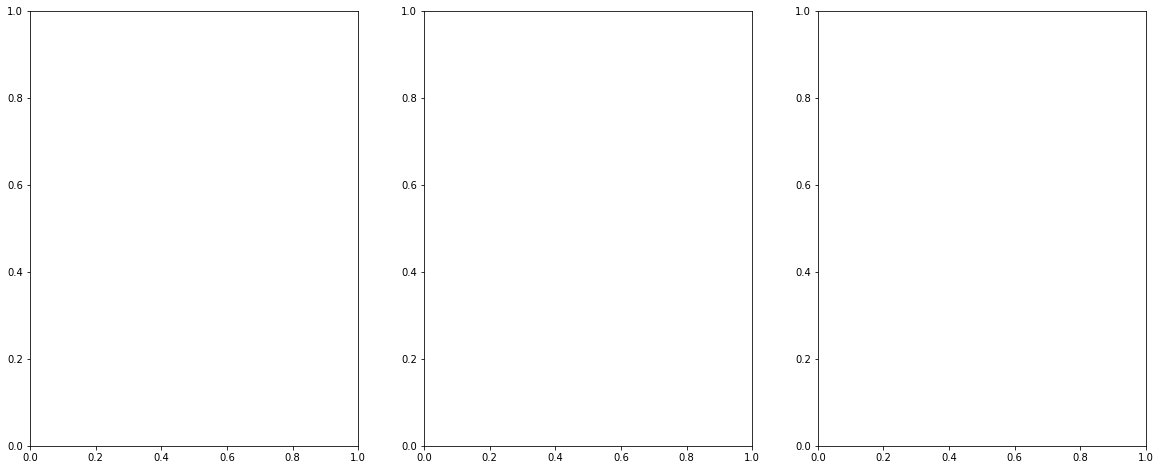

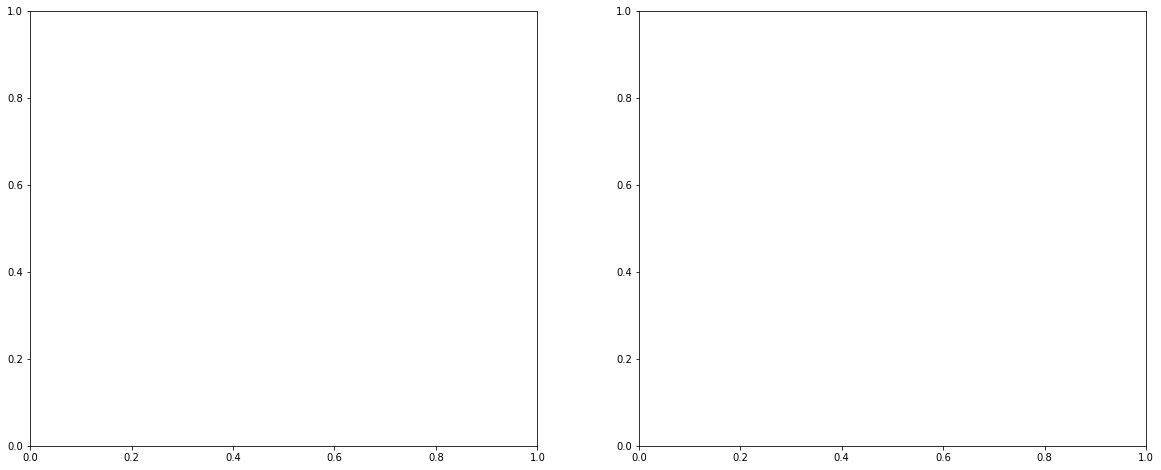

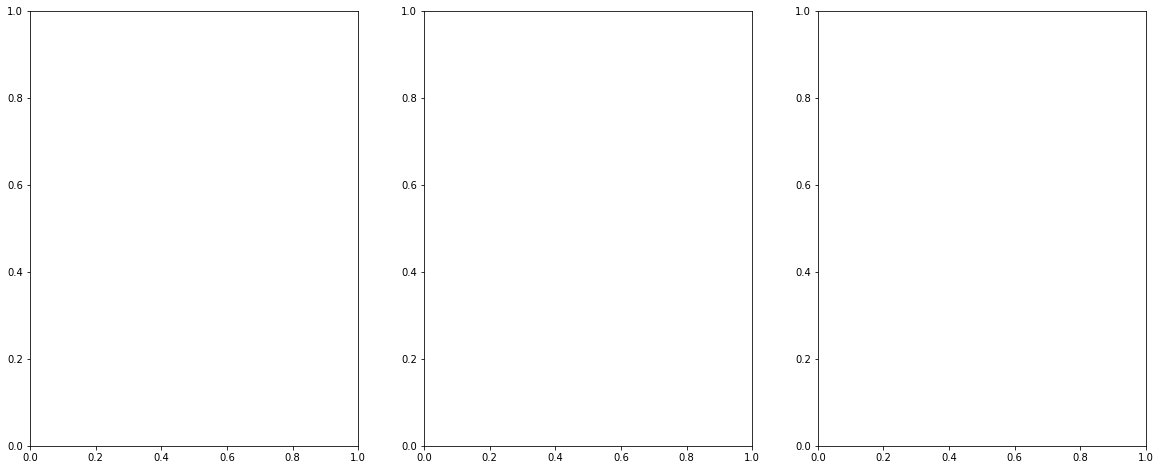

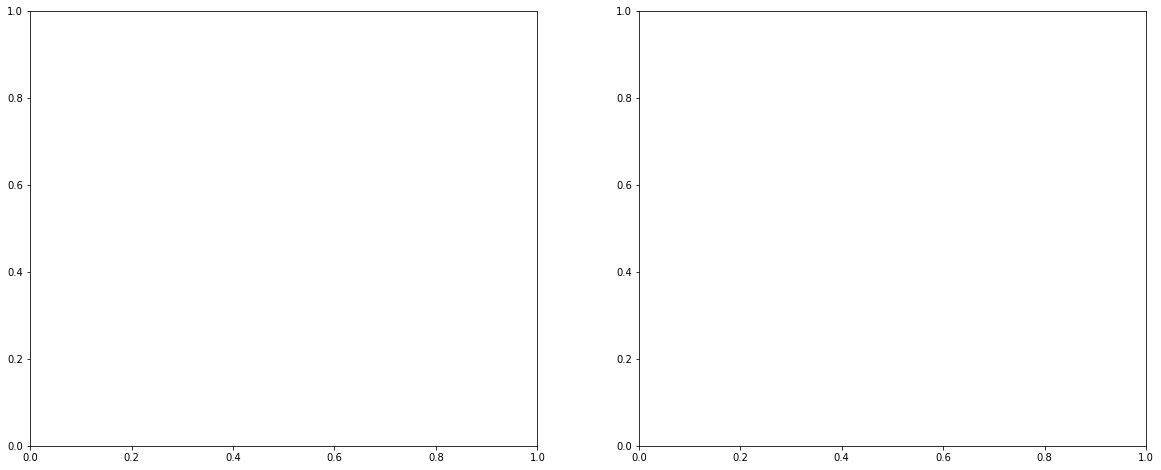

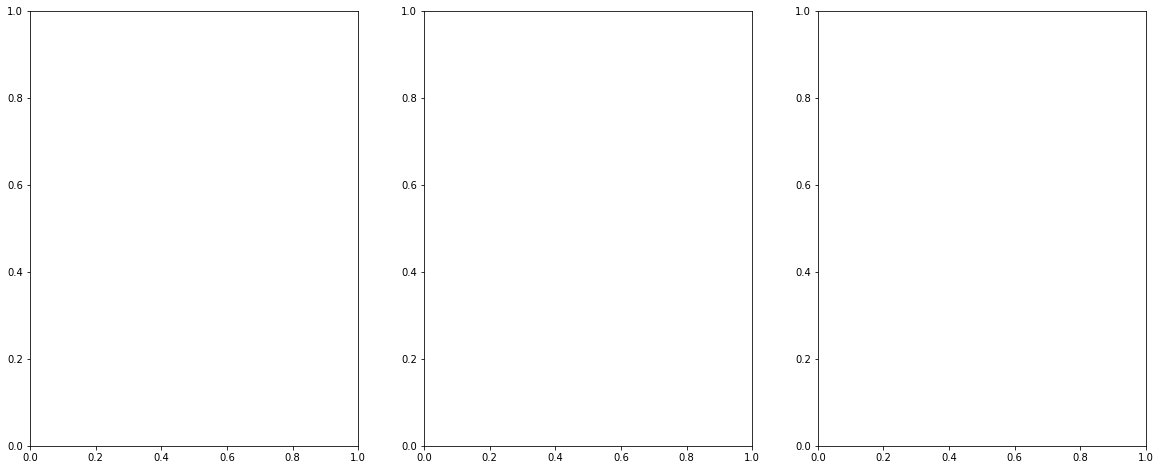

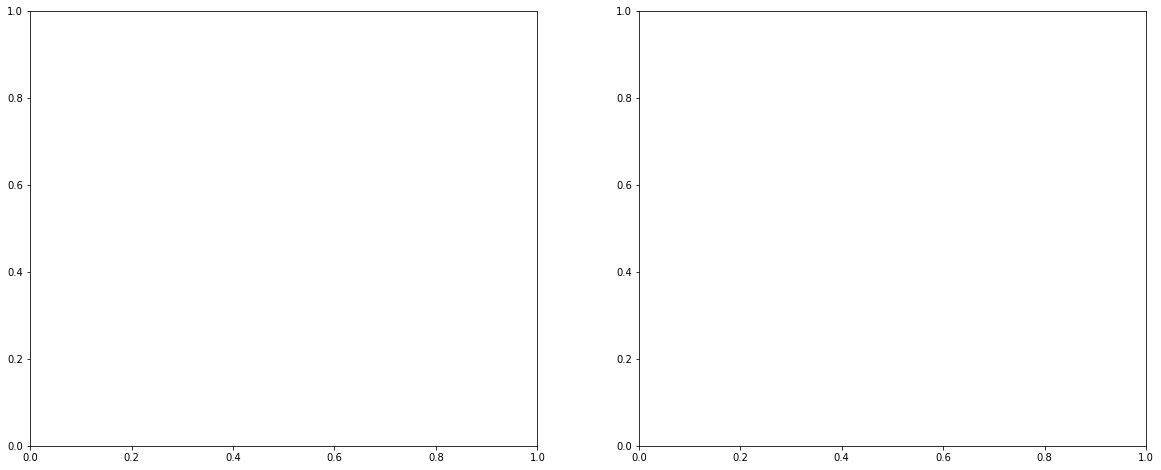

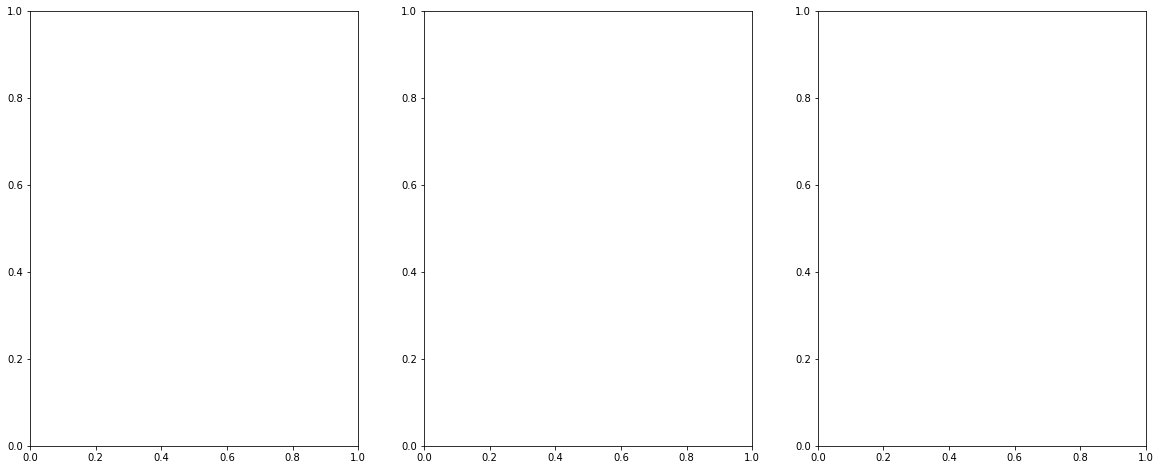

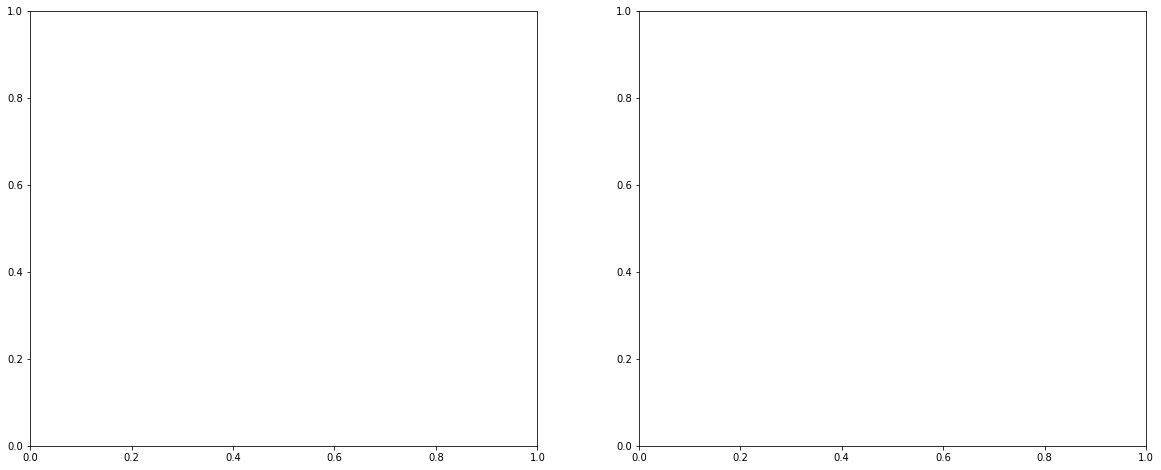

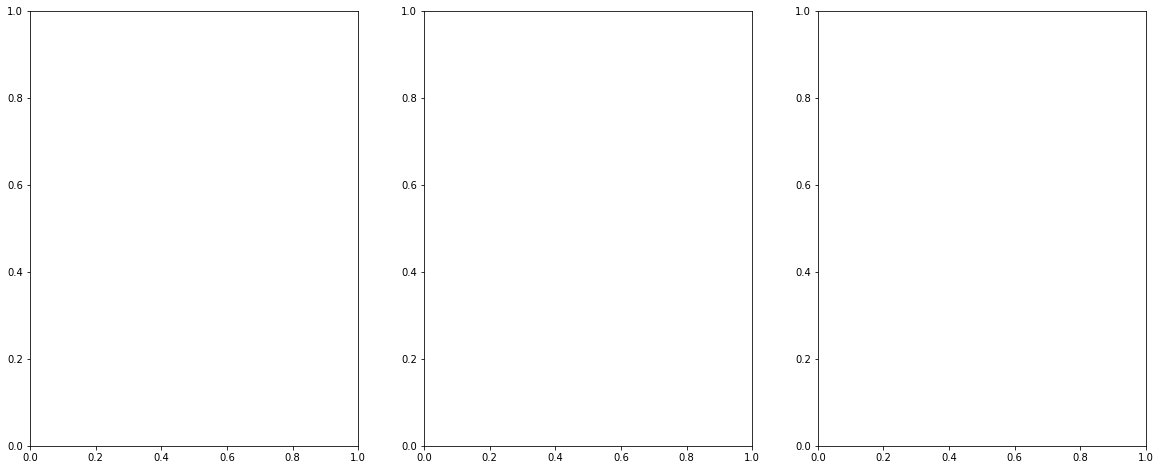

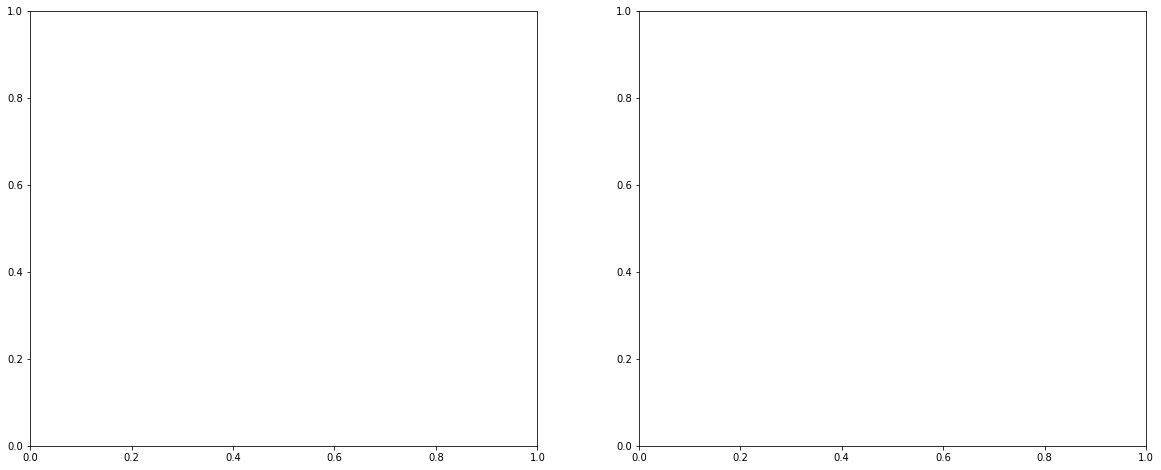

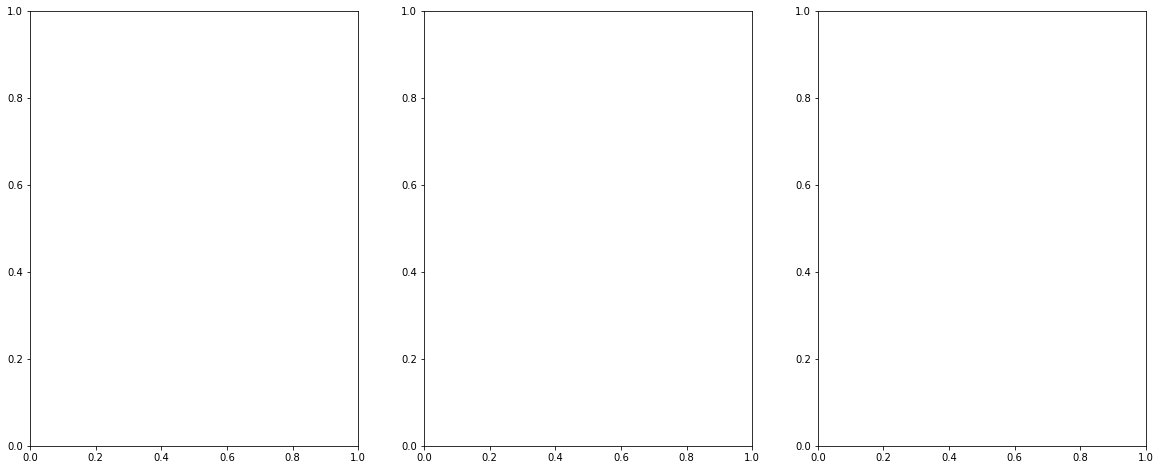

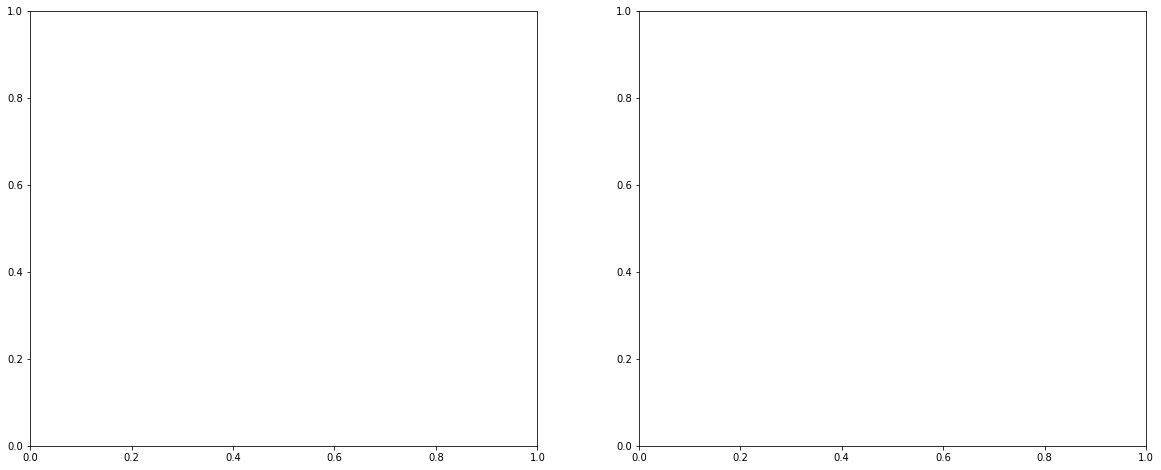

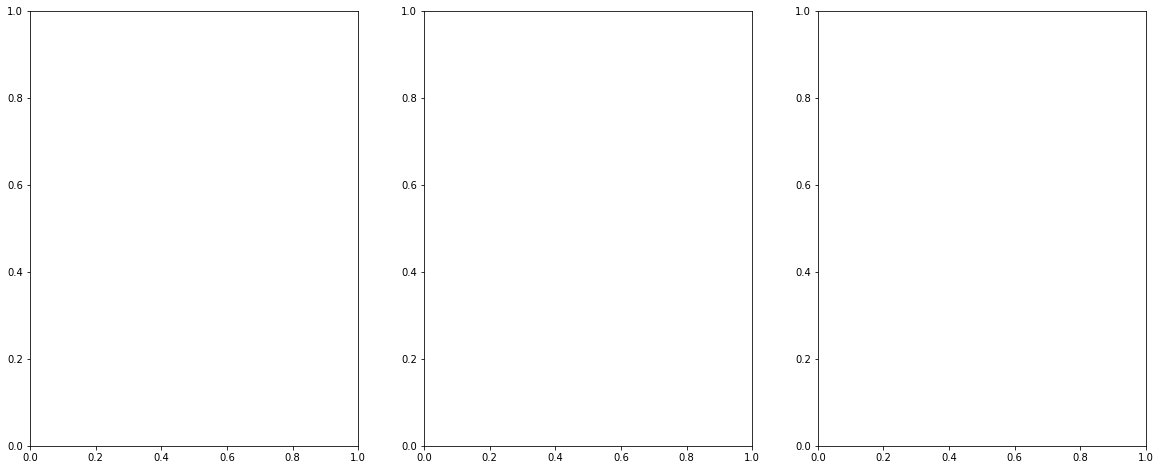

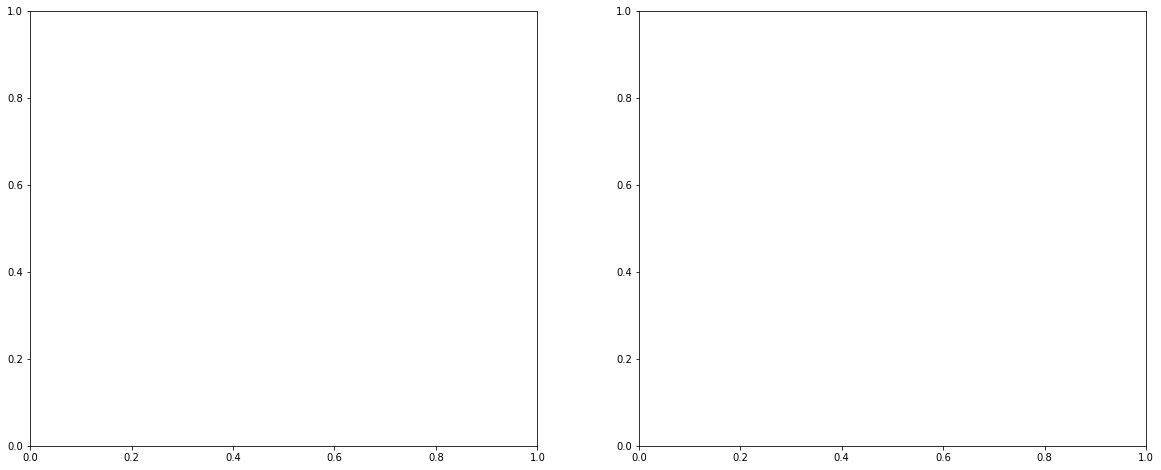

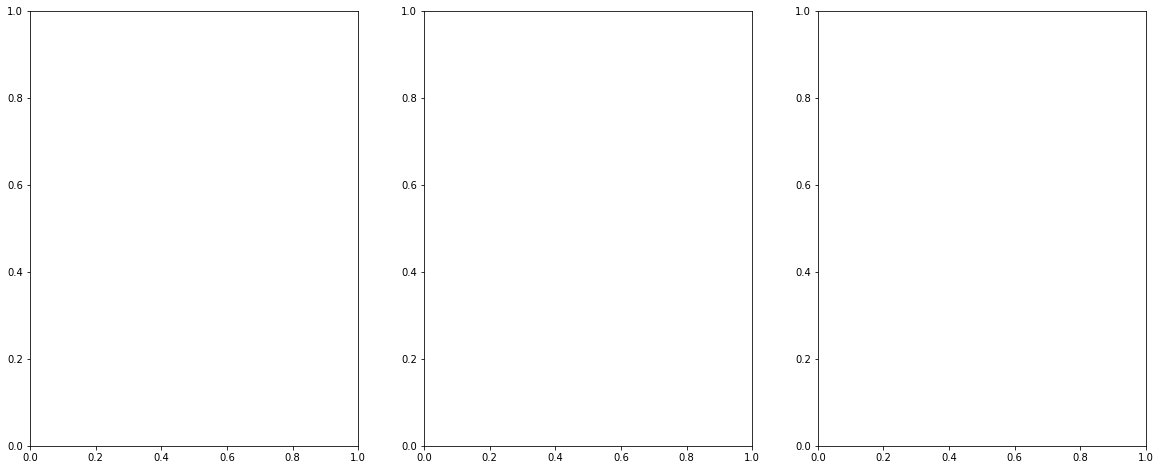

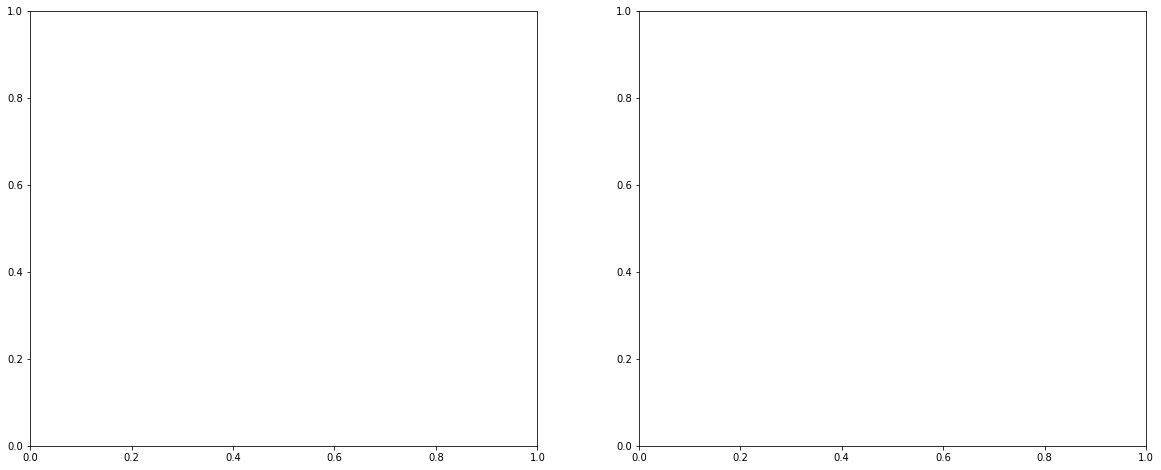

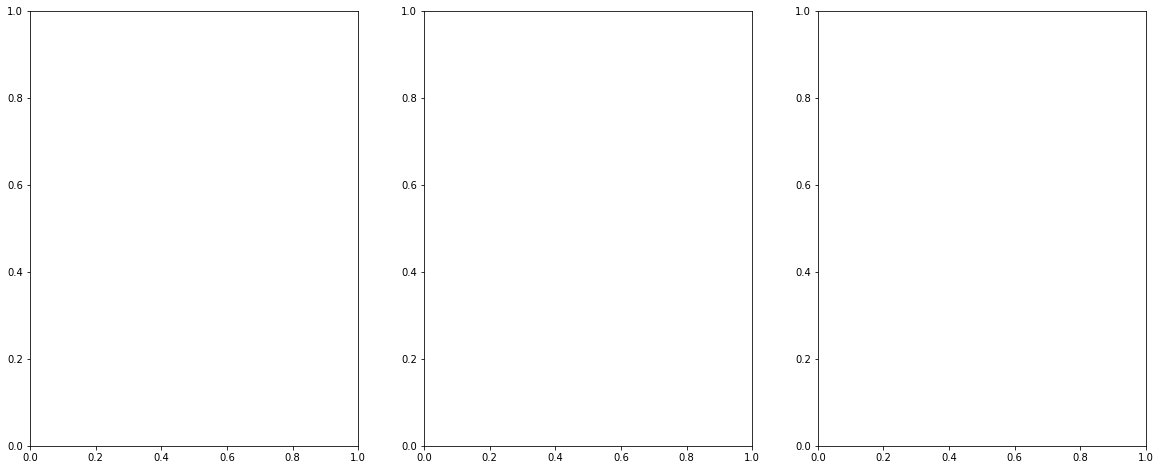

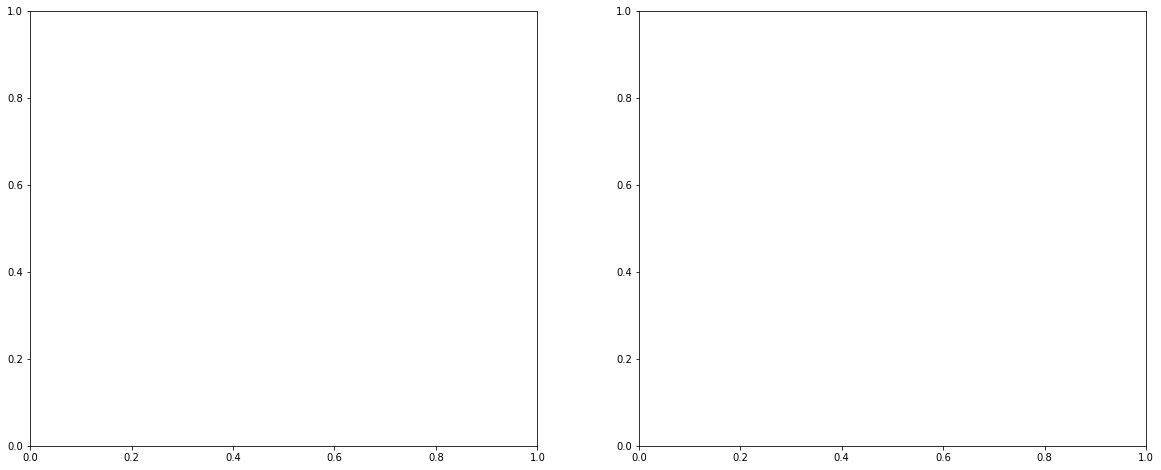

In [155]:
image1=io.imread('Clipped_NDVI/'+arr[0])
for i in range(1,len(arr)):
    image2=io.imread('Clipped_NDVI/'+arr[i])
    function(image1,image2,str(i),False)
    

(2135, 100)
(2135, 2118)
The 100 components explain 57% of the variance


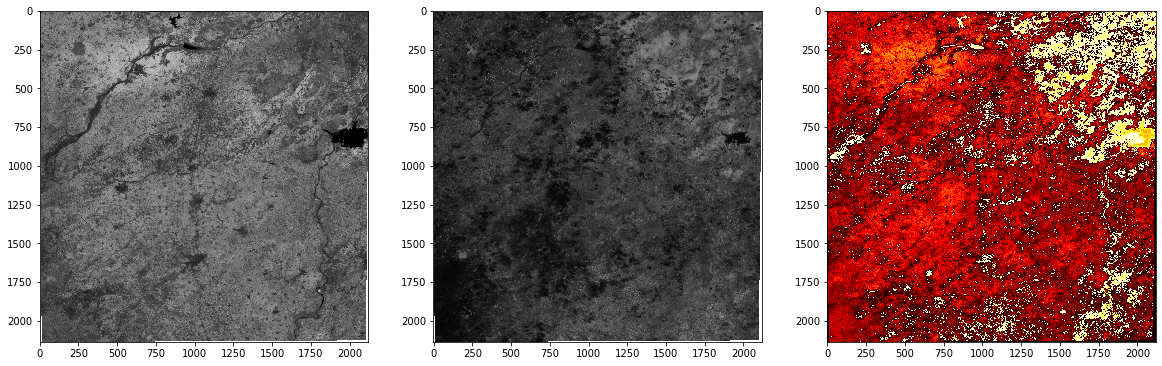

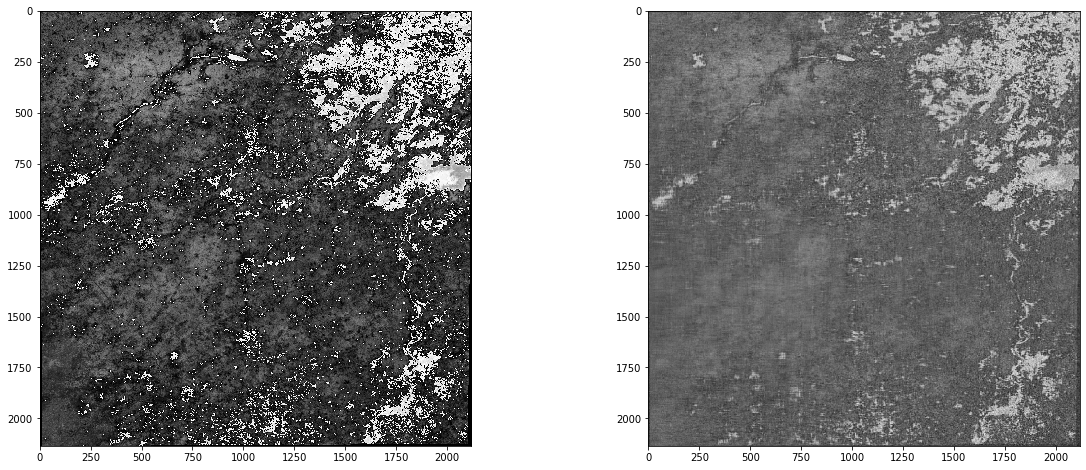

In [156]:
image1 = io.imread('awifs_ndvi_201701_15_1_clipped.tif')
image2 = io.imread('awifs_ndvi_201707_15_1_clipped.tif')

function(image1,image2,str(0),True)

# Collecting all Change detected image file names in an array

In [157]:
brr=[]
img_pt_p=r'/Users/venkateshbh/Desktop/satellite-image-deep-learning-master/change_detection/using_pca_and_k_means/diff_image'

for k in os.listdir(r'//Users/venkateshbh/Desktop/satellite-image-deep-learning-master/change_detection/using_pca_and_k_means/diff_image'):
                    if k=='.DS_Store':
                        continue
#                     print(k)
                    brr.append(k)
#                     img_pt=img_pt_p+"/"+k
#                     img = cv2.imread(img_pt)
    
#                     dim = (width, height)
#                     # resize image
#                     resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#                     #im_unpre.append(np.array(img).flatten())
#                     img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
#                     equ = cv2.equalizeHist(img_gray)
#                     equu.append(equ)
#                     immatrix.append(img_gray)
#                     kk=k[:-5]
#                     #print(kk)
#                     Y.append(myDict[kk])
brr.sort()
# print(brr)

41diff_image.jpg
9diff_image.jpg
45diff_image.jpg
31diff_image.jpg
26diff_image.jpg
22diff_image.jpg
35diff_image.jpg
25diff_image.jpg
32diff_image.jpg
36diff_image.jpg
21diff_image.jpg
18diff_image.jpg
42diff_image.jpg
46diff_image.jpg
4diff_image.jpg
12diff_image.jpg
38diff_image.jpg
16diff_image.jpg
28diff_image.jpg
11diff_image.jpg
15diff_image.jpg
7diff_image.jpg
3diff_image.jpg
14diff_image.jpg
10diff_image.jpg
29diff_image.jpg
2diff_image.jpg
6diff_image.jpg
1diff_image.jpg
5diff_image.jpg
17diff_image.jpg
39diff_image.jpg
13diff_image.jpg
19diff_image.jpg
20diff_image.jpg
37diff_image.jpg
33diff_image.jpg
24diff_image.jpg
47diff_image.jpg
43diff_image.jpg
44diff_image.jpg
8diff_image.jpg
40diff_image.jpg
34diff_image.jpg
23diff_image.jpg
27diff_image.jpg
30diff_image.jpg
['10diff_image.jpg', '11diff_image.jpg', '12diff_image.jpg', '13diff_image.jpg', '14diff_image.jpg', '15diff_image.jpg', '16diff_image.jpg', '17diff_image.jpg', '18diff_image.jpg', '19diff_image.jpg', '1diff_im

# Calculating mean 

In [158]:
means = []
for k in range(len(brr)):
    image3=io.imread('diff_image/'+brr[k])
    sumi = 0
    count = 0
    for i in range(0,len(image3)):
        for j in range(0,len(image3[i])):
            count += 1
            sumi += image3[i][j]
    print(sumi/count)
    means.append(sumi/count)
    
image3.shape

55.29398553272607
57.565463861669684
74.00096396892478
83.48461807237176
68.5277237816596
100.49202796151201
142.44537089251713
160.6234687401176
158.61477024190998
148.84133168801816
102.2053645235552
135.27280519601143
147.16836970054823
140.52697321718824
201.22056842985185
131.71579900617655
164.95684563891967
160.46326015661455
74.15241744122532
55.2249711959274
57.49867003690902
135.32652363039676
43.58058395419655
84.28922915657695
54.20256903578782
46.25352913468364
47.562159741526294
65.7297702529672
70.05581245176285
77.27162804377777
68.92109232119914
87.12258792152907
83.67506639863952
103.76117631188453
153.94377356571198
149.14211940476744
113.15362400567899
75.81208444182019
95.13275526158078
67.34364220587227
102.06935799536923
63.907348189821604
44.85872713642184
49.408642990935284
55.14147543195052
54.96103433710827
49.68472930806094


(2135, 2118)

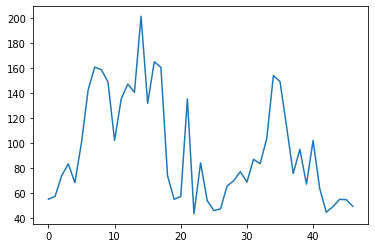

In [160]:
plt.plot(means)

# Plotting smooth graph

In [212]:

# from scipy.interpolate import spline
# import scipy.interpolate.UnivariateSpline
# import csaps
from scipy.signal import savgol_filter
from scipy.signal import argrelextrema
from scipy.signal import find_peaks

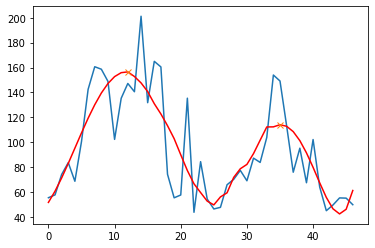

In [213]:
import numpy as np
import matplotlib.pyplot as plt

# x = np.linspace(0,2*np.pi,100)
# y = np.sin(x) + np.random.random(100) * 0.2
yhat = savgol_filter(means, 25, 5) # window size 51, polynomial order 3
peaks, _ = find_peaks(yhat, height=0)

plt.plot(means)
# print(yhat)
plt.plot(yhat, color='red')
plt.plot(peaks, yhat[peaks], "x")
plt.show()



# # 300 represents number of points to make between T.min and T.max
# xnew = np.linspace(means.min(), means.max(), 300)  

# power_smooth = spline(means, xnew)

# plt.plot(xnew,power_smooth)
# plt.show()

In [227]:
sortId = np.argsort(yhat)
# x = x[sortId]
# y = yhat[sortId]

# this way the x-axis corresponds to the index of x
# plt.plot(x-1, y)
plt.show()
maxm = argrelextrema(yhat, np.greater)  
minm = argrelextrema(yhat, np.less)  
print(maxm, minm)


(array([12, 35]),) (array([25, 44]),)


In [250]:
import itertools
maxm1=list(itertools.chain(*maxm))
minm1=list(itertools.chain(*minm))
maxm1

[12, 35]

In [247]:
print("Harvest months are  ",((maxm1[0]+1)//2)%12+1,",",((maxm1[1]+1)//2)%12+1)

Harvest months are   7 , 7


In [261]:
print("Sowing months are  1 ",((minm1[0]+1)//2)%12+1)

Sowing months are  1  2


In [226]:
print("Crop cycle duration is :",(maxm1[1]+1)//2-(maxm1[0]+1)//2)

Crop cycle duration is : 12


In [259]:
rate = (yhat[maxm1[0]] - yhat[0]) / (maxm1[0] - 0)
print("Greenery rate is: ",rate)

Greenery rate is:  8.746235177499473


In [221]:
# import itertools
# maxm1=list(itertools.chain(*maxm))
# minm1=list(itertools.chain(*minm))
# maxm1

In [220]:
# means1 = []
# for k in range(len(arr)):
#     image3=io.imread('Clipped_NDVI/'+arr[k])
#     sumi = 0
#     count = 0
#     for i in range(0,len(image3)):
#         for j in range(0,len(image3[i])):
#             count += 1
#             sumi += image3[i][j]
#     print(sumi/count)
#     means1.append(sumi/count)
    
# # image3.shape

In [219]:
# plt.plot(means1)